In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import re
import os
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

W0708 13:09:24.309279 4739532224 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [2]:
hello = tf.constant("Hello, tensorflow")
print(hello)

sess = tf.Session()
print(sess.run(hello))

Tensor("Const:0", shape=(), dtype=string)
b'Hello, tensorflow'


In [2]:
# run elmo embeddings from scratch

elmo = hub.Module("module/module_elmo2/", trainable=True)
sentence_input = ["the cat is on the mat", "what are you doing in evening"]

word_embeddings = elmo(
    inputs = sentence_input, 
    signature = "default",
    as_dict = True)["word_emb"]

lstm1_embeddings = elmo(
    inputs = sentence_input, 
    signature = "default",
    as_dict = True)["lstm_outputs1"]

lstm2_embeddings = elmo(
    inputs = sentence_input, 
    signature = "default",
    as_dict = True)["lstm_outputs2"]

elmo_embeddings = elmo(
    inputs = sentence_input, 
    signature = "default",
    as_dict = True)["elmo"]

default_embeddings = elmo(
    inputs = sentence_input, 
    signature = "default",
    as_dict = True)["default"]


print(word_embeddings)
print(lstm1_embeddings)
print(lstm2_embeddings)
print(elmo_embeddings)
print(default_embeddings)


W0708 13:09:28.332037 4739532224 deprecation.py:323] From /Users/daniellee/.local/lib/python3.7/site-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Tensor("module_apply_default/bilm/Reshape_1:0", shape=(2, 6, 512), dtype=float32)
Tensor("module_apply_default_1/concat:0", shape=(2, ?, 1024), dtype=float32)
Tensor("module_apply_default_2/concat_1:0", shape=(2, ?, 1024), dtype=float32)
Tensor("module_apply_default_3/aggregation/mul_3:0", shape=(2, 6, 1024), dtype=float32)
Tensor("module_apply_default_4/truediv:0", shape=(2, 1024), dtype=float32)


In [4]:
# assign elmo module to "elmo" variable

elmo = hub.Module("module/module_elmo2/", trainable=True)
sentence_input = ["the cat is on the mat", "what are you doing in evening"]

# create an "embeddings" tensor for two sample sentences using the elmo module
embeddings = elmo(
    inputs = sentence_input, 
    signature = "default",
    as_dict = True)["elmo"]

embeddings

<tf.Tensor 'module_1_apply_default/aggregation/mul_3:0' shape=(2, 6, 1024) dtype=float32>

In [5]:
# run a session using the "elmo_embeddings" tensor to create the ELMO embeddings and save in variable "message_embeddings"

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    message_embeddings = session.run(embeddings)

# print type and length of the embeddings

print(type(message_embeddings))
print(len(message_embeddings))

# print the first embeddings for the first sentence, print type and length
print(message_embeddings[0])
print(type(message_embeddings[0]))
print(len(message_embeddings[0]))

# print each of the six embeddings for the first sentence
print(message_embeddings[0][0])
print(type(message_embeddings[0][0]))
print(len(message_embeddings[0][0]))

print(message_embeddings[0][1])
print(message_embeddings[0][2])
print(message_embeddings[0][3])
print(message_embeddings[0][4])
print(message_embeddings[0][5])

# print the scalar value of the 1024th dimension of the 6th embedding of the second sentence
print(message_embeddings[1][5][1023])


<class 'numpy.ndarray'>
2
[[ 0.30815452  0.26630372  0.235613   ... -0.37085718  0.16490507
  -0.07245942]
 [ 0.51428753 -0.13532326  0.11090407 ...  0.04046863 -0.0478974
   0.7365962 ]
 [-0.02588051 -0.07283653 -0.079356   ... -0.29072428  0.72421414
   0.43863517]
 [-0.34798035 -0.02910249 -0.81993073 ... -0.9204842   0.02188802
   0.12106002]
 [-0.21827465 -0.13076591 -0.25209627 ... -0.29693586 -0.15828016
  -0.04900745]
 [ 0.10072576 -0.02953491 -0.24494296 ... -0.3723504  -0.14875814
   0.21592234]]
<class 'numpy.ndarray'>
6
[ 0.30815452  0.26630372  0.235613   ... -0.37085718  0.16490507
 -0.07245942]
<class 'numpy.ndarray'>
1024
[ 0.51428753 -0.13532326  0.11090407 ...  0.04046863 -0.0478974
  0.7365962 ]
[-0.02588051 -0.07283653 -0.079356   ... -0.29072428  0.72421414
  0.43863517]
[-0.34798035 -0.02910249 -0.81993073 ... -0.9204842   0.02188802
  0.12106002]
[-0.21827465 -0.13076591 -0.25209627 ... -0.29693586 -0.15828016
 -0.04900745]
[ 0.10072576 -0.02953491 -0.24494296 ..

In [37]:
# load a subset of the FNC dataset

data = pd.read_csv("w210_FakeNews-master/data/FNC_Subset.csv")
data.head()


,Unnamed: 0,Unnamed: 0.1,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,0,0,2,express.co.uk,rumor,https://www.express.co.uk/news/science/738402/...,"Life is an illusion, at least on a quantum lev...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Is life an ILLUSION? Researchers prove 'realit...,Sean Martin,NaN,[''],THE UNIVERSE ceases to exist when we are not l...,NaN,NaN,NaN
1,1,1,6,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,"Unfortunately, he hasn’t yet attacked her for ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,NaN,NaN,NaN
2,2,2,7,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,The Los Angeles Police Department has been den...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,NaN,NaN,NaN
3,3,3,8,barenakedislam.com,hate,http://barenakedislam.com/2017/12/24/more-winn...,The White House has decided to quietly withdra...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"MORE WINNING! Israeli intelligence source, DEB...","Cleavis Nowell, Cleavisnowell, Clarence J. Fei...",NaN,[''],NaN,NaN,NaN,NaN
4,4,4,9,barenakedislam.com,hate,http://barenakedislam.com/2017/12/25/oh-trump-...,“The time has come to cut off the tongues of t...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"“Oh, Trump, you coward, you just wait, we will...","F.N. Lehner, Don Spilman, Clarence J. Feinour,...",NaN,[''],NaN,NaN,NaN,NaN


In [38]:
# examine summary stats for 'type' column
print(data['type'].describe())
print(data['type'].unique())

data['type'].fillna('unknown',inplace = True)
print(data['type'].describe())
print(data['type'].unique())

count     9939
unique      12
top       fake
freq      3663
Name: type, dtype: object
['rumor' 'hate' 'unreliable' 'conspiracy' 'clickbait' 'satire' 'fake'
 'reliable' 'bias' 'political' 'junksci' nan 'unknown']
count     10000
unique       12
top        fake
freq       3663
Name: type, dtype: object
['rumor' 'hate' 'unreliable' 'conspiracy' 'clickbait' 'satire' 'fake'
 'reliable' 'bias' 'political' 'junksci' 'unknown']


In [ ]:
# print some examples of the articles
print(data['content'].head())

print(len(data['content'][0]))
print(data['content'][0])

print(len(data['content'][100]))
print(data['content'][100])


In [9]:
# examine article lengths

# data['content']

# plot distribution of the 'types' of articles

# data['type']=='fake'.count()
# plt.hist('type', data = data)


10000

In [39]:
# isolate the reliable articles

reliable = data.loc[data['type'] == 'reliable']
satire = data.loc[data['type'] == 'satire']
fake = data.loc[data['type'] == 'fake']
political = data.loc[data['type'] == 'political']
bias = data.loc[data['type'] == 'bias']

print(type(reliable['type']))
print(len(reliable['type']))
print(type(fake['type']))
print(len(fake['type']))

print(len(satire['type']))
print(len(political['type']))
print(len(bias['type']))

<class 'pandas.core.series.Series'>
202
<class 'pandas.core.series.Series'>
3663
200
935
157


In [40]:
# select random sample of 200 from fake news, then combine reliable and fake news in a new dataframe

import random
fake = fake.sample(n=200)
print(type(fake))
print(fake.head())

data = reliable.append(fake)

<class 'pandas.core.frame.DataFrame'>
      Unnamed: 0  Unnamed: 0.1     id             domain  type  \
3007        3007          3007   3449  beforeitsnews.com  fake   
8965        8965          8965  10149  beforeitsnews.com  fake   
5169        5169          5169   5853  beforeitsnews.com  fake   
5290        5290          5290   6006  beforeitsnews.com  fake   
2399        2399          2399   2752  beforeitsnews.com  fake   

                                                    url  \
3007  http://beforeitsnews.com/politics/2018/01/brea...   
8965  http://beforeitsnews.com/gold-and-precious-met...   
5169  http://beforeitsnews.com/gold-and-precious-met...   
5290  http://beforeitsnews.com/economy/2018/01/ceo-t...   
2399  http://beforeitsnews.com/survival/2018/01/the-...   

                                                content  \
3007  News Out of Utah…. It’s Really Bad, Teen Eats ...   
8965  DC Metro Train Derails With 60 Onboard\n\n% of...   
5169  GOLD INVESTMENT bars pushed

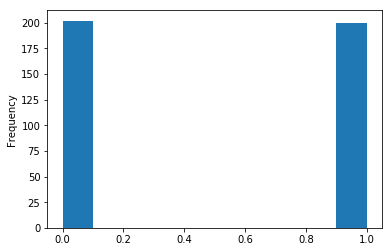

In [41]:
# change "reliable", "nan", and 'unkown' to 0
# change "rumor","hate","unreliable", etc. to 1

data.loc[data['type'] == 'reliable', 'type'] = 0.0

# data.loc[data['type'] == 'rumor', 'type'] = 1.0
# data.loc[data['type'] == 'hate', 'type'] = 1.0
# data.loc[data['type'] == 'unreliable', 'type'] = 1.0
# data.loc[data['type'] == 'conspiracy', 'type'] = 1.0
# data.loc[data['type'] == 'clickbait', 'type'] = 1.0
# data.loc[data['type'] == 'satire', 'type'] = 1.0
data.loc[data['type'] == 'fake', 'type'] = 1.0
# data.loc[data['type'] == 'bias', 'type'] = 1.0
# data.loc[data['type'] == 'political', 'type'] = 1.0
# data.loc[data['type'] == 'junksci', 'type'] = 1.0

# data.loc[data['type'] == 'nan', 'type'] = 0.0
# data.loc[data['type'] == 'unknown', 'type'] = 0.0

# plot the distribution, as can be seen it is heavily skewed to fake news
data['type'].plot.hist()


In [103]:
# test embeddings function on one of the sample texts from the FNCsubset data
embeddings = elmo(
["Life is an illusion, at least on a quantum level, in a theory which has recently been confirmed by a set of researchers.

They finally have the means to test John Wheeler’s delayed-choice theory and concluded that the physicist was right.

In 1978, Mr Wheeler’s proposed experiment involved a moving object that was given the choice to act like a wave or a particle – the former acting as a vibration with a frequency that can distinguish it from other waves and the latter having no frequency that you can determine its position in space, unlike a wave – and at what point does it ‘decide’ to act like one or the other.

At the time, the technology was not available to conduct a strong experiment, but scientists have now been able to carry it out.]"",
signature="default",
as_dict=True)["elmo"]

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    message_embeddings = session.run(embeddings)
    
print(message_embeddings)
print(message_embeddings.shape)

# as can be seen below, EOL's need to be removed from the original text.


SyntaxError: EOL while scanning string literal (<ipython-input-103-369137307eeb>, line 2)

In [42]:
# define function to remove EOL, parse and clip texts to all be the same length

def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
#     text = replace_contraction(text)
#     text = replace_links(text, "link")
#     text = remove_numbers(text)
#     text = re.sub(r'[,!@#$%^&*)(|/><";:.?\'\\}{]',"",text)
#     text = text.lower()
    return text
x = list(data["content"].apply(cleanText))
y = list(data["type"])

print(y[0])
print(x[0])
print(x[1])

0
Facebook/DestinyTheGame Promo image for "Destiny 2's" first DLC "Curse of Osiris."  "Destiny 2's" Faction Rallies was one of the major events in the game that debuted recently. However, they did not run as smoothly as Bungie may have hoped.  Bungie was recently prompted to issue an apology to "Destiny 2" gamers after many of them noticed that they had received far less new weapons after winning in the Faction Rallies for Season 2. Meanwhile, other players also complained of receiving redundant loot items upon redeeming their Faction Engrams.  The game developer has since recognized these feedback from fans and explained that they had applied a new mechanism of distributing new weapons in the Faction Rallies for Season 2.  "It was not made clear beforehand that the new Season 2 weapons would be added throughout the events of the Season rather than all at once in the beginning. This was on us. No excuses," Bungie explained in a community forum.  In a separate statement explaining the d

In [10]:
embeddings = elmo(
["Life is an illusion, at least on a quantum level, in a theory which has recently been confirmed by a set of researchers.",
 "Life is an illusion, at least on a quantum level, in a theory which has recently been confirmed by a set of researchers.  They finally have the means to test John Wheeler’s delayed-choice theory and concluded that the physicist was right.  In 1978, Mr Wheeler’s proposed experiment involved a moving object that was given the choice to act like a wave or a particle – the former acting as a vibration with a frequency that can distinguish it from other waves and the latter having no frequency that you can determine its position in space, unlike a wave – and at what point does it ‘decide’ to act like one or the other.  At the time, the technology was not available to conduct a strong experiment, but scientists have now been able to carry it out."],
signature="default",
as_dict=True)["elmo"]

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    message_embeddings = session.run(embeddings)
    
print(message_embeddings)
print(message_embeddings.shape)

[[[-0.0870263  -0.27838832 -0.347139   ...  0.17157908  0.42688215
   -0.04030432]
  [ 0.08745942 -0.01249984 -0.11062862 ... -0.27067804  0.8397048
    0.41509447]
  [-0.35278898  0.3200208   0.05191882 ... -0.00235583  0.03955662
    0.17205761]
  ...
  [-0.02840839 -0.04353216  0.04130164 ...  0.02583169 -0.01429836
   -0.01650421]
  [-0.02840839 -0.04353216  0.04130164 ...  0.02583169 -0.01429836
   -0.01650421]
  [-0.02840839 -0.04353216  0.04130164 ...  0.02583169 -0.01429836
   -0.01650421]]

 [[-0.0870263  -0.27838832 -0.347139   ...  0.17797777  0.5181088
   -0.07269001]
  [ 0.08745942 -0.01249984 -0.11062862 ... -0.18683043  0.94077295
    0.43985328]
  [-0.35278898  0.3200208   0.05191882 ... -0.00114936  0.10714045
    0.23674479]
  ...
  [ 0.39828086  0.1374166  -0.14582439 ...  0.39320618 -0.00747535
   -0.16896307]
  [ 0.10640752 -0.22615457  0.34544307 ...  0.6071619  -0.05122649
   -0.20663765]
  [-0.5133636   0.652797   -0.50443995 ... -0.56620944  0.01218332
    0.37

In [43]:
# split data into train and test


msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

train_data = train[['content','type']].copy()
test_data = test[['content','type']].copy()

print(len(train_data))
print(len(test_data))
print(train_data['type'])
print(train_data['content'])

333
69
42      0
83      0
84      0
85      0
86      0
87      0
88      0
100     0
164     0
165     0
166     0
168     0
169     0
170     0
220     0
221     0
222     0
223     0
224     0
225     0
226     0
405     0
446     0
447     0
449     0
450     0
451     0
452     0
465     0
517     0
       ..
5930    1
5875    1
3570    1
9029    1
4135    1
8555    1
4347    1
4006    1
6695    1
1209    1
8427    1
6501    1
4546    1
8601    1
5615    1
9198    1
6828    1
1580    1
5548    1
213     1
9438    1
5536    1
1206    1
9947    1
6370    1
5033    1
9540    1
6944    1
4036    1
6338    1
Name: type, Length: 333, dtype: int64
42      Facebook/DestinyTheGame Promo image for "Desti...
83      (Screenshot: Facebook) Dr. Melina Abdullah, pr...
84      (Photo: Reuters) The teams of North and South ...
85      (Photo: Reuters/Dado Ruvic) Facebook.\n\nUPDAT...
86      (Screencap: YouTube/Tidningen Dagen) Annahita ...
87      (Screenshot: YouTube / MJofLakeland1) A Metro .

In [44]:
# remove EOL
x_train = list(train_data["content"].apply(cleanText))
y_train = np.array(train_data["type"])

x_test = list(train_data["content"].apply(cleanText))
y_test = np.array(train_data["type"])
    
print(x_train[0])
print(y_train)
print(type(y_train))

Facebook/DestinyTheGame Promo image for "Destiny 2's" first DLC "Curse of Osiris."  "Destiny 2's" Faction Rallies was one of the major events in the game that debuted recently. However, they did not run as smoothly as Bungie may have hoped.  Bungie was recently prompted to issue an apology to "Destiny 2" gamers after many of them noticed that they had received far less new weapons after winning in the Faction Rallies for Season 2. Meanwhile, other players also complained of receiving redundant loot items upon redeeming their Faction Engrams.  The game developer has since recognized these feedback from fans and explained that they had applied a new mechanism of distributing new weapons in the Faction Rallies for Season 2.  "It was not made clear beforehand that the new Season 2 weapons would be added throughout the events of the Season rather than all at once in the beginning. This was on us. No excuses," Bungie explained in a community forum.  In a separate statement explaining the dis

In [ ]:
%%time
embeddings = elmo(x_train,
                  signature="default",
                  as_dict=True)["default"]

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    xTrain = session.run(embeddings)
    
print(xTrain)
print(xTrain.shape)

In [30]:
print(xTrain)

NameError: name 'xTrain' is not defined

In [10]:
%%time
embeddings = elmo(x_test,
                  signature="default",
                  as_dict=True)["default"]

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    xTest = session.run(embeddings)
    
print(xTest)

print(xTest.shape)

[[[ 0.72939885 -0.5711676  -0.3972821  ... -0.68933475 -0.7358501
    0.3320889 ]
  [ 0.48736823 -0.29646385  0.6302877  ... -0.07735717 -0.5776854
   -0.525294  ]
  [-0.39332792 -0.01493053  0.51628906 ... -0.98234147  0.02344788
    0.0374179 ]
  ...
  [-0.02840839 -0.04353216  0.04130164 ...  0.02583169 -0.01429836
   -0.01650421]
  [-0.02840839 -0.04353216  0.04130164 ...  0.02583169 -0.01429836
   -0.01650421]
  [-0.02840839 -0.04353216  0.04130164 ...  0.02583169 -0.01429836
   -0.01650421]]

 [[-0.21162741  0.73238707 -0.70528907 ... -0.22885618 -0.00188732
   -0.1615034 ]
  [ 0.23766787  0.6927673  -1.0695705  ... -0.12584405  0.5855763
    0.20972265]
  [ 0.41185564  0.02380164 -0.28561315 ...  0.22432385  0.1135678
    0.095006  ]
  ...
  [-0.02840839 -0.04353216  0.04130164 ...  0.02583169 -0.01429836
   -0.01650421]
  [-0.02840839 -0.04353216  0.04130164 ...  0.02583169 -0.01429836
   -0.01650421]
  [-0.02840839 -0.04353216  0.04130164 ...  0.02583169 -0.01429836
   -0.0165

In [13]:
%%time
embeddings = elmo(x_train,
                  signature="default",
                  as_dict=True)["default"]

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    xTrain = session.run(embeddings)
    xTest = session.run(embeddings)

model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(xTrain, y_train, epochs=10, steps_per_epoch = 10)
test_loss, test_acc = model.evaluate(xTest, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Epoch 1/10
10/10 [==============================] - 1s 52ms/step - loss: 7.0002 - acc: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 6.9316 - acc: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 6.9316 - acc: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 6.9315 - acc: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 6.9315 - acc: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 6.9315 - acc: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 6.9315 - acc: 0.0000e+00
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 6.9315 - acc: 0.0000e+00
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 6.9315 - acc: 0.0000e+00
Epoch 10/10
15/15 [==============================] - 0s 22ms/sample - loss: 6.9315 - acc: 0.0000e+00
Test accuracy: 0.0
Test l

In [27]:
model.fit(x_train, y_train, epochs=10, steps_per_epoch = 10)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=['Subscribe to Canada Free Press for FREE  Having a life line to other supplies is important to energy security and the future supply needs of the world  Trump’s Offshore Leasing Plan Could Increase Discoveries  Global discoveries of new conventional oil and natural gas in 2017 totaled only 7 billion barrels of oil equivalence—a level last seen in the 1940s. (See chart below.) According to Rystad Energy, not only did the 2017 total volume of discovered resources decrease, but the resources per field also declined. In 2017, average offshore discoveries held 100 million barrels—down from 150 million barrels in 2012. The reserves replacement ratio reached just 11 percent for oil and natural gas in 2017—the eleventh straight year it was below 100 percent. The last time the reserve replacement ratio reached 100 percent was in 2006. Since 2014, exploration expenditures fell over 60 percent most likely due to low oil prices. Further, the world consumes 79 percent more hydrocarbons than it discovers. The Trump administration’s plan to open up most U.S. offshore areas to oil and gas drilling, however, could help boost investment in the sector by billions of dollars and open up access to billions of barrels of oil. Source: Rystad Energy  Trump’s Offshore Leasing Plan Could Increase Discoveries Low discovered volumes of oil can be an indicator of coming supply shortages and resulting price increases—10 years or more in the future. For this reason, the Trump administration is opening the majority of the U.S. Outer Continental Shelf (OCS) to leasing in the 2019 to 2024 time period with over 40 lease sales planned in the Department of the Interior’s proposal. According to Rystad Energy, the U.S. offshore sector held approximately 180 billion barrels of oil-equivalent oil and gas combined, before the first offshore production took place. In the Gulf of Mexico, which is the world’s most mature offshore region, nearly 50 percent of these original resources have been translated into production since the 1960s. The remaining 50 percent, or 90 billion barrels of oil equivalent, have yet to be discovered in the OCS. Out of the 90 billion barrels, Rystad Energy estimates a possible discovery of about 65 billion barrels of oil equivalent. That figure excludes resource potential from western and central areas of the Gulf of Mexico, but includes the eastern part of that region, which is currently under statutory moratorium until the end of June 2022.  Source: Rystad Energy  The Trump administration’s proposed policy has the potential to attract billions of dollars of investment. If operators use the full potential of the offshore areas, exploration activity could reach a new peak after 2030, with as many as 200 exploration wells drilled per year on average, implying annual investment levels of about $15 billion. According to Rystad, this is a “high-case scenario,” assuming all of the unexplored areas undergo exploration activity, regardless of capital constraints, infrastructure issues, or environmental concerns. However, during the last three years, there was little interest in exploration in the deep-water Gulf of Mexico. Instead, exploration and production spending was in U.S. shale basins, with U.S. companies directing over 60 percent of their total investments to shale. That percentage could increase to 70 percent in the coming decade. If this occurs, it could impose a risk to offshore exploration. Conclusion The U.S. is currently benefiting from an abundance of oil and gas due to investments in shale deposits and technology used largely on non-federal lands. When oil prices are low, it is easy for people to forget that benefits such as lower gasoline and heating costs and increased investment and new jobs come as a result of longterm due diligence on behalf of the private sector. Indeed, some policymakers cite today’s prices to argue that we need not plan for new exploration. However, it takes eight or more years to develop an offshore oil or gas field after leasing and permitting is approved for production to begin. It can take significantly longer in those areas without existing infrastructure. It also requires a large amount of investment. Due to the enormous cost, Congress provided the industry with incentives to develop the first deep-water offshore fields in the 1990s. While oil supplies are currently abundant as evinced by moderate prices, the supply could be diminished in the next 10 or 15 years. Policymakers should be aware of the recent history of conventional oil discoveries worldwide. Having a life line to other supplies is important to energy security and the future supply needs of the world.  The Institute for Energy Research (IER) is a not-for-profit organization that conducts intensive research and analysis on the functions, operations, and government regulation of global energy markets. IER maintains that freely-functioning energy markets provide the most efficient and effective solutions to today’s global energy and environmental challenges and, as such, are critical to the well-being of individuals and society.  Please adhere to our commenting policy to avoid being banned. As a privately owned website, we reserve the right to remove any comment and ban any user at any time.Comments that contain spam, advertising, vulgarity, threats of violence, racism, anti-Semitism, or personal or abusive attacks on other users may be removed and result in a ban.-- Follow these instructions on registering', "Vermont Sen. Bernie Sanders said the government shutdown is on Majority Leader Mitch McConnell’s shoulders because he brought a bill to the Senate floor that he knew couldn’t pass.  Sanders said on CNN’s “State of the Union” Sunday that McConnell knew he would have to get 60 votes on the continuing resolution to keep the government open for four weeks. However, McConnell knew that bill wasn’t going to get support from the full Republican Senate caucus, let alone the nine Democrats that would have had to jump partisan lines to advance the bill.  “Let's be clear, and I know people are sick and tired of the blame game, and I understand that. But here is the reality. It takes 60 votes in the United States Senate to get anything done,” Sanders said to host Jake Tapper.  “The other night, Mitch McConnell walked on to the floor of the Senate, and he knows the rules better than anybody. He did not have 60 votes. He barely had 50 votes. When you're in that situation, Jake, what it requires, and what we should be doing, is negotiating.”  Senate Democrats have complained they’ve been excluded from much of the legislative negotiations since Republicans took control of the government in January 2017.  While there were bipartisan negotiations leading up to the shutdown Saturday morning, Democrats were not willing to vote for a bill that didn’t include protections for about 800,000 illegal immigrants brought to this country as children, known as Dreamers.  President Trump ended the federal program that protects those Dreamers from being deported, but delayed it until March 5. Sanders said it’s time now for lawmakers to figure out a solution before that deadline comes and goes.  “The wall was a great idea in the 15th century when the Chinese built the Great China Wall,” Sanders said. “I don't think it makes a whole lot of sense now, but I'm willing to sit down in a room and do what the American people want and what the American people want is to provide legal status to the Dreamers and a path toward citizenship. Let's sit down and do that.”", 'Mormons and evangelicals have historically been the religious groups most closely identified with the Republican Party, and they have long aligned on such culture war issues as same-sex marriage, gender roles, transgender rights and abortion. However, those shared political views do not translate to a theological alliance.', '11 Of 19 Bear Market Indicators Have Now Been Triggered: BofA  Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!  Two weeks ago, Bank of America tripped recession-watcher alarms, when it announced out that one of its surest bear-market indicators, one which has never had a false negative, had just been triggered. As we said at the time, according to BofA’s Savita Subramanian in November the S&P 500’s three-month earnings estimate revision ratio (ERR) fell for the fourth consecutive month to 0.99 (from 1.03), indicating that for the first time in seven months, there were more negative than positive earnings revisions, needless to say a major negative inflection point in the recent surge in profits.  Why was this significant? Becase as BofA explained, the three-month S&P 500 ERR has been used by the bank as one of its 19 key “bear market signposts”, and with the one-month ERR falling below 1.0 for the second time in six months, this marks the trigger for the 11th bear market signpost. BofA’s ERR rule is triggered when, over a six-month window, all of the following criteria are met: 1) the one-month ERR falls from above 1.0 to below 1.0; 2) the one-month ERR is below 1.0 for two or more months; and 3) the three-month ERR falls below 1.1 for at least one month. Incidentally, the hit rate of the “ERR” bear market indicator, meaning its historical accuracy in predicting a bear market is 100%, the only question is how long it takes. The last time this trigger was set was mid-2003, and here is the punchline from Bank of America:  Since 1986, a bear market has followed each time that the ERR rule has been triggered. While individual signposts may not be useful for market timing (this one was triggered several years too early in the last two cycles), prior bear markets were preceded by a broader array of signals having been triggered.  This is shown in the chart below:  Ok fine, one indicator has been tripped. What about the rest? Well, as BofA reports in its just released Investment Strategy slidepack, its latest list of bear market signposts shows that as of this moment, 11 of 19 signals have been triggered at this point. That’s the bad news; the good news is that at least 80% were triggered ahead of the last seven bear markets.  Here is the breakdown:  Specifically, the following indicators have now been triggered:  Bear markets have always been preceded by the Fed hiking rates by at least 75bp from the cycle trough  Minimum returns in the last 12m of a bull market have been 11%  Minimum returns in the last 24m of a bull market have been 30%  9m price return (top decile) vs. S&P 500 equalweight index  Consensus projected long-term growth (top decile) vs. S&P 500 equalweight index  We have yet to see a bear market when the 100 level had not been breached in the prior 24m  Similarly, we have yet to see a bear market when the 20 level had not been breached in the prior 6m  Companies beating on both EPS & Sales outperformed the S&P 500 by less than 1ppt within the last three quarters  While not always a major change, aggregate growth expectations tend to rise within the last 18m of bull markets  Trailing PE + CPI y/y% >20 in the prior 12m  Based on 1- and 3-month estimate revision trends; see footnote for more detail  And here are the 8 indicators that have yet to ring the proverbial bell.  Each of the last three bear markets has started when a net positive % of banks were tightening C&I lending standards  Companies with S&P Quality ratings of B or lower outperform stocks rated B+ or higher  In the preceding 12m of all but one (1961) bull market peak, the market has pulled back by 5%+ at least once  Forward 12m earnings yield (top decile) vs. S&P 500 equalweight index  A contrarian measure of sell side equity optimism; sell signal trigged in the prior 6m  A contrarian measure of buy side optimism  Does not always lead or catch every peak and all but one inversion (1970) has coincided with a bear market within 24m  Market peaks have come after the VIX >20 at some point in the prior 3m  And while more than half of BofA’s bear market triggered being triggered sound ominous, the following chart shows that on a historical basis, the minimum threshold for a bear market onset was no less than 80% of the signposts “flashing red.”  Which means that the bear market may or may not be imminent. So how should one trade this clearly overvalued market? Well, as Bank of America concedes, we are in a stage when fundamentals no longer matter. What does? Momentum.  Our US Regime Model, a quantitative framework for stock-picking, suggests we are in the mid to late stages of the market cycle and in this stage, momentum is the best way to invest. As contrarian value investors, this is not an easy call to make. But if this bull market is closer to over, our analysis of factor returns indicates that late-stage bull markets have been dominated by stocks with strong price momentum and growth, while value, analyst neglect, and dividend yield have been the worst-performing factors.  In other words, buy whatever everyone else is buying, just be sure to sell before everyone else sells. Good luck.  Source: http://silveristhenew.com/2017/12/21/11-of-19-bear-market-indicators-have-now-been-triggered-bofa/', 'Are you happy with the way the federal government is operating? If not, are you interested in helping us change the way Washington DC operates? These are questions Florida Senator Alan Hays of Lake County asks everyone as he strives to gather interest in amending the U.S. Constitution.  “A strong central government, like we have today, has proven time and time again that they are not going to change their behavior. So, it is time for us to assert our power as states and send a clear message to them that the states were the ones who created the federal government, and not vice versa.”  “The Convention of States Project (COS) seeks to urge and empower state legislators. The delegates at such a convention would have the power to propose amendments to the Constitution that would curb the abuses of the federal government.”  The Founders knew the federal government might one day become overbearing and abuse its power. Sen. Hays believes that day has arrived. The most important Constitutional check to this over-reaching power is Article V, which gives states the ability to call a convention for proposing amendments to the Constitution. Sen. Hays leads a growing group of citizens who believe Washington DC is broken and will not fix itself, but he has a solution.  Hays, a Republican, insists that this be a nonpartisan effort. “I think it is imperative that from the very beginning we establish credibility with those of different political persuasions that this is not a partisan issue. It absolutely must be nonpartisan. There must be an embracing of the principle of compromise, without compromising our principles.”  Hays has submitted a resolution in the Florida Senate requesting the U.S. Congress call a convention to be held for the purpose of amending the Constitution. “It’s our obligation to send men and women to that convention who have a clear head on as to what a constitutional republic is all about. The cold hard reality is it is going to require the assistance of at least 34 states and the approval of at least 38 states. This is a true nonpartisan issue. It is imperative for the survival of the republic that we get ourselves back on course.”  “Three areas that we are offering amendments will be to reform the fiscal powers of the federal government, to restrain other powers and jurisdiction of the federal government, and to limit the term limits for federal officials and members of Congress.” A group of 5 to 10 amendments may be proposed at such a convention.  “Tax reform alone could repatriate billions of dollars to this country. You bring ten to twenty billion dollars back into the United States and you will see jobs everywhere. That will launch the recovery of our economy and restore the dignity of work to those people who want a job.”  Convention of States    Some may wonder what good is amending the Constitution. They think the government does not follow the existing Constitution already. Sen. Hays responds, “By us going through with the Convention of States and ratifying those proposed amendments, we will send a very clear message to Congress, and it will change the face of Congress, and change the court system as well.”  Term limits for U.S. Congressmen and Senators, and for Supreme Court justices, have already becoming a leading issue within the COS movement. Among COS supporters, a 12 year term limit for members of the U.S. Congress is being sought. Regarding this, Hays draws from his experience in the Florida legislature. He thinks the 8 year term limits in the Florida Legislature is inadequate to do the job effectively. “My idea of term limits in the U.S. Congress is 18 years. That would be three terms for each senator and nine terms for each member of the House of Representatives.”  Currently, the resolution calling for a Convention of States, SM476, has been assigned to the Judiciary Committee and to the Rules Committee. It must then pass through the Senate chamber. A similar measure must also pass through the Florida House of Representatives. Sen. Hays hopes that Florida will be “the first state in the nation to get the measure passed through their legislature.”  “One of the biggest challenges before the whole Convention of States effort is to break down the partisan walls.” Hays plans to spend much time reaching across the aisle to his Democratic colleagues. His message will be to “help us restore America to her days of grandeur when she was that shining city on a hill, and not fight that Republican-Democrat battle.”  “If you peruse the writings between Hamilton, Jefferson, Franklin, Madison and the other Founding Fathers, you see very clearly that they understood what tyrannical government was all about. They were determined to retain the power of the states instead of allowing a tyrannical government to overpower everybody, and they gave us this tool with Article V of the Constitution.”  Could this be an idea whose time has come? Sen. Hays thinks so. “This is an issue that I will not let rest. I will go forward on this until I am absolutely shut down, or I am successful, one of the two.”', 'Man Who Delivered Gift-Wrapped Horseshit To Steven Mnuchin Compares Himself to Jesus  Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!  An LA County psychologist who thinks President Trump’s tax bill stinks to high heaven, compared himself to Jesus after admitting he delivered a gift-wrapped box of horseshit as a Christmas present to Treasury Secretary Steve Mnuchin. Robby Strong told AL.com he dropped off the box of horse manure at Mnuchin’s house as an “act of political theater” to hammer home the point that “Republicans have done nothing for the American worker.”  Boldly taking the Christ-analogy to a place it has never gone before, Strong told SoCal radio station 89.3 KPCC that “what I did, I would like to compare to what Jesus did when he went into the temple and overturned the tables of the money-changers, who were exploiting the people financially in the name of religion.”  “In the long run, if we don’t do stuff like this, what are we going to have left?” Robby told KPCC. “I feel like that’s what the GOP has done to the American people,” added the man who, bizarrely, is a psychologist with the LA Department of Mental Health.  Things start to make much more sense, however, once we learn that Strong claims he was an organizer for the Occupy LA movement; predictably he sides with critics of the $1.5 trillion tax overhaul who say it favors corporations and the wealthy, CBS Los Angeles reported.  He told KPCC that he “borrowed” some manure from a pal who owns horses and gift-wrapped it in a festive box. Strong then added a card addressed to Mnuchin and Trump. “We’re returning the ‘gift’ of the Christmas tax bill. It’s bullshit. Warmest wishes, The American People. P.S. – Kiss Donald for me,” he wrote.  On Saturday, the bearded “psychologist” also posted several images on Facebook, one of which shows him posing with a shovel next to the box, and another that shows the box full of what appears to be dung.    Robby Strong, source: facebook  “I need someone to ride along and document my Secret Santa project. I’m going to hand deliver boxes of horse shit to Steve Mnuchin over in Beverly Hills,” he added in a message. “No disguises, no fake names. Totally owning this one. You’re only powerless if you do nothing!!!” he wrote.  Strong then said he delivered one box to a home Mnuchin owns in Beverly Hills, and another to his mansion in Bel Air. Mnuchin was not in Los Angeles when he received the stinking presents, CBS reported. Authorities, including the Secret Service and a Los Angeles bomb squad, responded and police discovered the package contained horse manure after unwrapping it.  In a Facebook comment, he wrote that the package was “pure organic horseshit, just like everything that administration’s done so far.”  “Bomb scares certainly were not my intention, but maybe they should be a little scared, eh,” he wrote.  After the stung bought him 15 minutes of fame, Strong said he realizes he might have put his job at risk – and that he was surprised he has not been arrested by the Secret Service, which questioned him at his home.  “I just got interviewed by the Secret Service and I’ve now joined some of my heroes like Timothy Leary and Martin Luther King,” he told AL.com. “[The agents] just showed up in my yard.”  Meanwhile, Strong mocked suggestions the prank could have alarmed Mnuchin or his family, and insisted that he was merely exercising his First Amendment rights. “A few years ago when [a Supreme Court ruling] said that corporations are persons and money equals free speech, that is so absurd and my rule of thumb is now that if corporations are free speech, then so is horseshitt.”  According to the Post, the Secret Service interviewed the main who claimed to have sent the package, but Strong was not arrested. Strong also said he didn’t violate laws about mailing hazardous waste. “It was a gift-wrapped package of poo,” Strong told AL.com. “Is there a law that you can’t drop off a box of poo? Not really.”  Source: http://silveristhenew.com/2017/12/25/man-who-delivered-gift-wrapped-horseshit-to-steven-mnuchin-compares-himself-to-jesus/', 'Arkansas Gun Battle  % of readers think this story is Fact. Add your two cents.  Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!  A suspect was shot and killed when he tried to rob an 81-year-old man at gunpoint outside of the man’s home in Genoa, Arkansas, on Thursday afternoon.  Buddy Cates told KSLA that he walked outside of his home around 1:30 p.m. and came face to face with the suspect, who authorities are still working to identify.  Cates said the suspect was holding a “big pistol,” but Cates also had his hand in his pocket, gripping his own gun.  “The battle was one,” Cates recalled, noting that, between the two, at least a dozen shots were fired.  “Whoever got the biggest gun and fastest will be boss when it is all said and done,” Cates said. “In this case, it was me.”  Cates was uninjured, but the suspect died after he was taken to a hospital in Texarkana, not far from Cates’ home.  After the attempted robbery and subsequent shooting, three women were arrested in connection to the crime, according to reports from the Texarkana Gazette. Kiana Keshaun Montgomery, 21; Shaynesha Martin, 19; and Ke’Erica Turner, 20, are all facing charges for aggravated robbery and are being held at the Miller County Detention Center. Authorities did not say what part the women played in the robbery or whether they are believed to be responsible for other crimes.  Read the Whole Article  The post Arkansas Gun Battle appeared first on LewRockwell.  Source: http://freedombunker.com/2017/11/12/arkansas-gun-battle/', 'Stephen Bassett – Hillary Clinton Aimed to Be “UFO Disclosure President” – Stephen Believes We Are Near the End of Days (Video)  % of readers think this story is Fact. Add your two cents.  Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!  Stephen Bassett is the executive director of Paradigm Research Group founded in 1996 to end a government imposed embargo on the truth behind the so called “UFO” phenomenon.  Stephen has spoken to audiences around the world about the implications of formal “Disclosure” by world governments of an extraterrestrial presence engaging the human race.  He has given over 1000 radio and television interviews, and PRG’s advocacy work has been extensively covered by national and international media.  In 2013 PRG produced a “Citizen Hearing on Disclosure” at the National Press Club in Washington, DC. On November 5, 2014 PRG launched a Congressional Hearing/Political Initiative seeking the first  hearings on Capitol Hill since 1968 regarding the extraterrestrial presence issue and working to see that issue included in the ongoing presidential campaign.', 'You Wont Believe What the Sanhedrin Sent to the Pope and the Shocking Announcement Coming July 12th By the Temple Institute- Third Temple?  Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!  By Lisa Haven  This just in! The Temple Institute, an institute fully devoted to rebuilding the Third Jewish Temple, has announced that on July 12th they will be sharing “exciting news about the future.”  If you are a Christian who studies Bible prophecy then you are one of many who are hoping and praying that this “announcement” will be their decision to finally build the third temple.  Prophetically speaking the bible tells also tells us that in the future a third temple will be resurrected. This is found in Matthew 24:15 that states, “Therefore when you see the ‘abomination of desolation,’ [Anti-Christ] spoken of by Daniel the prophet, standing in the holy place [Jewish Temple]…” The word, “holy place,” used in this Scripture, is referencing the New Jewish Temple that will be rebuilt in Jerusalem in the near future.  Today the Temple Institution has devoted themselves specifically to that cause. They have restored over 60 different sacred temple vessels including: the Priest’s breastplate, the crown of the priest, the shofar, musical instruments, the laver, the mizrak, and more. Some of the most important vessels have also been completed: the Menorah, the Incense Alter, the Golden Table of Showbread, and the infamous Ark of the Covenant.  The Temple would have been built if it wasn’t for the Muslims, “Dome of the Rock,” standing in the place the Israelites desire to build. In truth, the temple can’t be built until some kind of arrangement can be made to either, build it where the “Dome of the Rock” lies or build it in another location. Could it be that this “exciting announcement” has something to do with a third temple?  Coincidentally, as the announcement arose from the Institute, the Rabbinical Sanhedrin, who are linked to the organization, made a threatening declaration to the pope in regards to his comments on Palestine. Could it be that their announcement has something to do with the fact that they are infuriated with the pope?  Please don’t miss this breaking report…  Will the Temple be built Next to the Dome of the Rock??  More Critical Reads You Need to Hear by Lisa Haven! Click Here!  Subscribe to My Website at: www.LisaHavenNews.net  Like Me on Facebook and Seen.is:  https://www.facebook.com/pages/Lisa-Haven/194854627280186?ref=hl  https://www.seen.is/profile/34  For More Information See:  http://www.thesanhedrin.org/en/index.php?title=The_Sanhedrin_Initiative  https://www.templeinstitute.org/  Twitter Temple Institute: https://twitter.com/templeinstitute  Facebook Temple Institute: https://www.facebook.com/pages/The-Temple-Institute/22738684968  http://www.breakingisraelnews.com/44759/pope-francis-tried-sanhedrin-jewish-world/#DodYZxVM0mQoOMEL.97', 'It is well past time that all those with genuine science training take an objective look at all the preposterous claims of human caused climate change and publicly reject this sham science. Carbon dioxide is neither a toxin nor a climate factor. Given unlimited budget and every chemical compound on the planet as a possible fire suppression system for the Shuttle and Space Station, NASA chose carbon dioxide.  Even OLD fools pale in comparison to those with genuine scientific training who ignore debate and endorse dogma in its place. Only the most self deceptive of fools can allow themselves to be a tool of these NWO ghouls. Climatology is the shadiest branch of science, fattened with excessive government green monies and devoid of knowledge or conscience.  The current atmospheric level of CO2 is approaching 400 parts per million, and NASA tests revealed no measurable side effects from prolonged exposure to 50,000 parts per million. Your own exhaled breath is 40,000 parts per million and total human contribution to the atmosphere is only 10 parts per million. To demonize CO2 the Climatologists had to create a series of lies and support them with false hypothesis and fabricated data.  Physics and thermodynamics certainly presented a challenge to early scientists, but were easily visible reactions. Far more difficult was Chemistry, involving 106 elements with bizarre interactions. The first element to be isolated and identified was Phosphors in 1649. There would be no real understanding of chemical reactions until Dmitri Mendeleev published the first periodic table of elements in 1869.  Climatology is still in that dark-age period, with no working model and only a limited number of elements. Even though it is obvious that there are a large number of ‘elements’ that affect climate, the current group has been financially focused on just one element. A benign, trace gas that is vital to all life has been falsely cast as a demon.  Wall Street economic bubbles do not just occur, they are carefully crafted, packaged and marketed to the unsuspecting. This science bubble has been a century in the making, with excessive packaging and marketing during the last two decades. It is a creation of the mega-wealthy to steal what little remains of your freedom and your property. And the mega-wealthy control the entire system.  The Mid-Term Hangover is Over  When the Obama voters called for change it took two years before they realized they had been cheated. The tea bag voters call for change will realize success or failure far sooner than that. As the largest ever freshman class of congressmen enter the corridors of power for the first time they will be sitting ducklings for the seasoned septic system crocks gliding just below the surface.  You might have gone to the polls on Nov 2 and elected a ‘conservative’ Republican who was going to remove corruption, return sanity and reduce spending. You may have even believed the candidates claims that they would investigate the false science of global warming. Sorry, the joke is on you.  The way congress ‘works’ is that all power rests in the committee chairmen, who are picked by the party in the majority. When the Democrats took majority power, in 2006, it was impossible to ‘hear’ about climate change fraud. When the RINOS take power in 2011 nothing will change, for they serve the same master.  The powerful committee chairmanships are awarded on two factors, seniority and wealth. And due to the amazing power of being a government servant, those two traits are often connected. The longer you ‘serve’ the wealthier you get with only the rarest of exceptions. Those exceptions are known as ‘honest’ representatives.  With almost a quarter of the incumbents defeated, you would think that the newly seated Republican committee chairmen would honor their pledges to investigate Climatology, the greatest fraud in all of history. Well, surprise. Rep Darrell Issa, (R-CA) who is a minority member of the House Oversight and Government Reform Committee, demanded hearings when ClimateGate happened in Nov 2009.  Rep Issa promised investigations of emails and the flawed climate science of warming if the Republicans regained the House. Only six days after their victory this RINO said “I have limited resources and limited time…although this is a significant issue, it may not be the first that come to my committee.” He then added that maybe the House Science and Technology Committee would investigate.  My Rotten RINO Rep  The most likely chairman of that S & T whitewash committee would be my Rep Michael McCaul (R-TX 10th), serving the most gerrymandered district in the nation. This Tom DeLay creation extends from a 30-mile arc north and west of Houston, then to a thin strip for 160 miles to the north of Austin. This district was designed to unseat Lloyd Doggett (D-TX 25th), who just moved his residence to a more favorable district.  This political neophyte, McCaul won his first race for any elected position with this seat in 2004. The remarkable leap from unknown to immediate Chairman of his first ever committee was aided by a wealthy family background and his marriage to the daughter of Clear Channel Communications. It is amazing the undue respect you get in Washington when your father-in-law owns 800 radio stations.  I will never respect Michael McCaul for his shameful bungling of his House investigation on the wrongful prosecution of US Border agents Ignacio Ramos and Jose Compean for the wounding of repeated drug smuggler Osvaldo Davila. This was a blatant case of prosecutorial and judicial misconduct of epic proportions, dismissed by McCaul.  Rep McCaul’s official website touts his minority chairmanship of the Ethics Committee and he has led the prosecution of Rep Charlie Rangel (D-NY)….well until Sep 14, 2010. As McCaul grilled Rangel over $600,000 in undisclosed income it was revealed that McCaul had failed to disclose millions earned from 2008 stock transfers.  It may be of interest to hard working, tax payers that McCaul entered Congress with a declared net worth of $25 million in 2004 and is currently listed as the 5th wealthiest with over $110 million in total assets. Oh, and that other guy that’s too busy to investigate the climate science fraud, Rep Darrell Issa is the second wealthiest, behind John Kerry who has $188 million. Maybe wealth doesn’t taint judgment, we’ll see.  My Walk Through the Corridors of Power  It is not often that the lowly can challenge the powerful. One of those moments was when the Berlin wall fell in 1989. Sensing the winds of change, I stepped from obscurity to present a radical 27.5 mile high speed rail plan connecting Houston’s two airports, seven university campuses, the medical center and downtown. This billion dollar project could have been completed in five years and was called ‘visionary’ by the local media.  That media coverage opened political doors that included one hour private meetings with four Houston mayors, seven US Congressmen, all members of city council and two dozen state Reps and Senators. My rail proposal was opposing a 14-mile Disney monorail no-bid contract that was in violation of the state competitive bidding law.  As then former chairman of METRO and future mayor told me, the local power elite planned on hiding $200 million of ‘excess profit’ in that billion dollar rail project. This man had just collected $70 million from the Resolution Trust Corporation for his failed saving and loan operation and didn’t need the extra money.  This man served three terms as mayor and was term limited from office. His successor then funded $2 million in taxpayer funds to lobby the state legislature to allow no-bid contracts and Houston got a seven-mile-long trolley for a billion dollars. This mixed-mode light rail nightmare has had hundreds of train car collusions and you can literally outrun the train with a rickshaw. A rigged game cannot allow a single honest player.  I felt the winds of change blowing again with the overt push for cap and trade. This time you did not need to be a visionary to see the false science or the intended theft. This time I would not be dependent on the controlled local news media to present truth to power. This time the same information revolution that freed Russia and half of Europe can finish the job and free all of humanity.  The urge for freedom is universal and would have been universally realized in 1989, except for the actions of George Bush the Elder, the greatest Neville Chamberlin of all time. This NWO tool cast a billion Chinese into slavery and then set in motion the Bush-Clinton-Bush era of intentional de-industrialization of America.  On Nov 2, 2010 the voters denounced the total socialization of our country. We sent a hundred ducklings to paddle through the swamp with our message. These ducklings are out- numbered three to one by seasoned elected crocks and ten to one by lobbyists and hookers. This time freedom can win, but only if you participate. You must find and share truth, for it is only truth that can challenge power. It is time to teach these tools a lesson.', 'Top Expert Says Weeks To Crisis as 23 Nation’s Stock Markets Crash! Doomsday Market Clock Strikes One Minute to Midnight!  Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!  By Lisa Haven  The collapse of the dollar will be the single largest event in human history. It will be the first event that touches every single person living in the world. All human activity is controlled by money. Our work, our wealth, our government, our food, even our relationships are affected by money. No money in history has had as much of an impact as the dollar. It is the de facto world currency. All other currency collapses will pale in comparison to this one. This collapse will be worldwide and it will take down not only the dollar but all other fiat currencies, as they are essentially no different. This collapse will lead to the collapse of all paper assets and the consequences to this will have inconceivable results universally.  Well you can stop waiting for such a crisis to happen because quite frankly, we are already there. In fact according to the latest report from Zero Hedge there are 23 nations worldwide whose stock markets are currently crashing. Here is the list of 23:  1. Malaysia  2. Brazil  3. Egypt  4. China  5. Indonesia  6. South Korea  7. Turkey  8. Chile  9. Colombia  10. Peru  11. Bulgaria  12. Greece  13. Poland  14. Serbia  15. Slovenia  16. Ukraine  17. Ghana  18. Kenya  19. Morocco  20. Nigeria  21. Singapore  22. Taiwan  23. Thailand  If we add to that the fact that the London Telegraph is reporting that the Doomsday Market Clock has been set to “one minute to midnight” then we’ve got a real issue on our hands.  So how bad is it here in America?  Here are 5 charts proving a deflationary financial crisis is brewing and according to The Money GPS, hyperinflation will follow…  But lets not stop there, how about the fact that leading expert Harry Dent, is warning us there will be a collapse within weeks!!! Here is that breaking report from Infowars…  More Critical Reads You Need to Hear by Lisa Haven! Click Here!  Subscribe to My Website at: www.LisaHavenNews.net  For More Information See:  http://www.zerohedge.com/news/2015-08-18/23-nations-around-world-where-stock-market-crashes-are-already-happening', 'What Are We Seeing Over the Vegas Skyline in This New Footage? – Video  % of readers think this story is Fact. Add your two cents.  Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!  HighImpactFlix  Published on Oct 18, 2017  SUBSCRIBE 435K  If you like my videos and want to support more content on my heavily censored, demonetized channel: *  Patreon: https://www.patreon.com/highimpactflix (a buck or two a month will help me create more high quality videos)', 'Please submit transitions — including staff changes, ordinations, anniversaries or deaths — to Barbara Francis. This page will be updated weekly.  STAFF CHANGES  David Berube, to Federated Church of Edgartown, Mass., as pastor.  Shiloh Bradshaw, to First Baptist Church, Holden, Mass., as pastor.  Andy Brown, to Crossroads Baptist Church, San Antonio, Texas, as family life and children’s pastor.  Ben Brown, to First Baptist Church, Waynesboro, Va., as minister to families with youth.  Coralotta Darwin, to First Baptist Church, Plymouth, Mass., as pastor.  David Doles, to Federated Church, Brookston, Ind., as pastor. He comes from First Baptist Church, Columbus, Ind., where he was pastor.  Walter Draughon III, to First Baptist Church, Bristol, Va., as interim pastor.  Tom Ertz, to Jordan’s Grove Baptist Church, Central City, Iowa, as pastor.  Ben Faus, to First Baptist Church, Cuero, Texas, as youth minister.  Kory Ferree, to New Prospect Baptist Church, Bloomington, Ind., as pastor.  Eddie Graves, concluding his tenure as pastor of Cornerstone Baptist Church, Valdese, N.C.  Gail Hill, to First Baptist Church, Chico, Wash., as pastor.  Sandor Hull, to First Hungarian Baptist Church, Detroit, Mich., as pastor.  Tali Jamir, to First Baptist Church, Belmont, Mass., as pastor.  Meg Lacy, concluding her tenure as minister of spiritual formation and care at Emerywood Baptist Church, High Point, N.C., effective the end of October.  Phil Lowther, to First Baptist Church, Cambridge Springs, Penn., as assistant pastor.  Nathaniel Manderson, to First Baptist Church, Gloucester, Mass., as pastor.  Alexander Payne Sr., to McKinley Memorial Baptist Church, Willow Grove, Pa., as pastor.  Jerrell Riggins, to Messiah Baptist Church, Brockton, Mass., as pastor.  David Roberts, to Sycamore Baptist Church, Franklin, Va., as intentional interim pastor.  Andy Roby, to The Memorial Baptist Church, Greenville, N.C., as associate pastor for music and worship arts.  Garrett Saake, to Emerywood Baptist Church, High Point, N.C., as interim minister of music.  Bert Schmid, to First Baptist Church, Hickory, N.C., as church administrator.  Sarah Stender, to First Baptist Church, Beaufort, S.C., as minister of music and worship arts.  Annie Sutton, to Johns Creek Baptist Church, Alpharetta, Ga., as children’s pastor.  Nancy Wilbanks, to First Baptist Church, Littleton, Mass., as pastor.  Rob White, to First Baptist Church, Davenport, Iowa, as pastor.  Baptist News Global provides a free listing of ministry-related jobs for Baptist churches, theological institutions and organizations across the United States. Click here to learn more.  RETIREMENT  John S. Williams, retiring as executive minister of the American Baptist Churches Central Region.  ORDINATIONS  Christi S. Hollifield, ordained to ministry on Oct. 8 by First Baptist Church, Marion, N.C.  Kathryn House, ordained to ministry on Sept. 17 by First Baptist Church, Jamaica Plain, Mass.  Jay Thornton, ordained to ministry on June 25 by First Baptist Church, Pella, Iowa.  DEATH  Robert Bradford, 91, died Sept. 8 in Everett, Wash. He was an American Baptist pastor at numerous churches for 35 years, including a Baptist church start in Hawaii. He was regional director of the American Baptist Churches of the Pacific Northwest. He is preceded in death by his wife, Betty, and is survived by three children, six grandchildren and six great-grandchildren.  KUDOS  STAFF ANNIVERSARY  Renee Purtlebaugh, 10 years as associate pastor to children and their families at Highland Baptist Church, Louisville, Ky.  In case you missed them:  Transitions for the week of 10.06.17  Transitions for the week of 09.29.17  Transitions for the week of 09.22.17  There were no transitions for the week of 09.15.17', 'In life, there are tons of hard truths we will have to learn to accept, but some need to come sooner rather than later. In order to survive and become the best possible version of yourself, you need to be strong.  Being strong consists of a lot of things, but unfortunately, most people are lacking in these areas. We don’t realize just how much goes into being strong and how mentally intense it can be. The hard truths in the list below will help you grow in life, accepting these things is the start of something big.  10 Hard Truths You Need to Accept Now to Ensure A Better Life For Yourself:  1. You define yourself.  No one on this planet can define you. You are who you make yourself into. People will try to call you things you are not throughout life, but that does not make those things true.  2. The little things matter more than you know.  We get so caught up in the big things that we forget to pay attention to the small things. The small things will be what you remember most when you are old and on your deathbed. Pay attention to the things that are important to you.  I’m am sorry to say this, but you are not perfect. No one on this planet is perfect. We all make mistakes and we all learn from one another.  4. Only YOU can make yourself happy.  No one can make you happy but yourself. Happiness is something that you can only find within. Only YOU can make yourself happy.  Complaining only distracts the mind. If you don’t want to do something either get it over with or don’t do it at all. No one is holding a gun to your head forcing you, in life, we do not actually ‘have’ to do most things we do.  6. We all have to die at some point.  Death is going to happen to us all whether we are ready for it or not. Those we care about will leave us and we have to accept it. No one lives forever.  7. Life is never easy.  Nothing in life is easy; you have to work hard in life to get where you want to be. We all contribute in some way or another.  Change is going to happen whether you like it or not. Some of these changes are going to be good, and others may push you to your breaking point. Everything happens for a reason.  9. There are lots of things you cannot control, but you can always control your response.  While we cannot control change sometimes we can choose how we respond to it. Just because something bums you out doesn’t mean you need to let everyone know. Make the most of everything. Think as positively as you can.  Even the bad things that happen in your life happen for a reason. Learn each lesson life brings to your door. Do not shut out a chance to learn something new. Life is what you make it.  (Image Via: Pixabay/Jills)', 'Obama’s The Greatest Criminal In History Say Trump And Joe Arpaio Because He Forged His Birth Certificate (Video)', 'Huge! Two Devils Converging On September 23rd!! What They Discuss Will Have Serious Implications…  % of readers think this story is Fact. Add your two cents.  Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!  By Lisa Haven  I find it ironic that two widely discussed “Antichrist types”, Pope Francis and President Obama, are meeting on the widely discussed day of prophecy, Wednesday, September 23rd. Not only does this meeting land on the Jewish Holiday Yom Kippur, also known as Day of Atonement, and considered the holiest day of the year in Judaism, it is also the 266th day of the year, which just so happens to line up with Pope Francis being the 266th Pope.  Is this all just one big fat coincidence? Or is there a deeper meaning behind this meeting? What exactly will these two devils be discussing? All that and more is exposed in the video below…  (Image above Created by: The Wild Voice- http://thewildvoice.org )  More Critical Reads You Need to Hear by Lisa Haven! Click Here!  Subscribe to My Website at: www.LisaHavenNews.net or  Check Me out On Youtube  For More Information See:  http://thewildvoice.org/new-world-kings-pope-francis-obama/  https://www.washingtonpost.com/national/religion/obama-to-host-pope-francis-at-white-house-in-september/2015/03/26/e7130aea-d3e7-11e4-8b1e-274d670aa9c9_story.html  http://www.opendoorsuk.org/persecution/worldwatch/saudi_arabia.php  http://www.independent.co.uk/news/world/anger-after-saudi-arabia-chosen-to-head-key-un-human-rights-panel-10509716.html  http://www.nbcnews.com/storyline/europes-border-crisis/john-kerry-u-s-accept-85-000-refugees-2016-100-n430576  http://thinkprogress.org/world/2015/09/06/3699093/pope-francis-welcome-refugees/', 'In September 2012, Libyan Islamists killed American Ambassador Chris Stevens as well as Sean Patrick Smith, Tyrone Woods and Glen Doherty in the infamous Benghazi attack. One of the perpetrators, Ahmed Abu Khattala — the primary facilitator in the attack — remained in Libya for nearly two years after the assault before U.S. Delta Forces apprehended him in the summer of 2014. From there he was shipped to the U.S., where he faced a civilian trial that concluded this week. The outcome of that trial has many people under the reasonable impression that justice didn’t prevail.  According to Fox News, “A federal jury found Ahmed Abu Khattala guilty Tuesday on just four of 18 charges related to the deadly 2012 attack on the U.S. consulate in Benghazi, Libya, precluding him from facing the death penalty. Khattala, 46, was convicted of two counts of conspiracy to provide material support to terrorists, one count of maliciously destroying U.S. property and placing lives in danger, and one count of using and carrying a semiautomatic weapon during the attack.”  Former prosecutor Andrew McCarthy believes one of the problems in the upshot of the case revolves around the previous administration’s handling in the immediate aftermath of the attack. He tweeted, “Obama admin, which insisted civilian prosecution always the way to go, tolerated Libya’s 3-week delay in giving FBI access to crime scene. Resulting taint, of course, huge problem in prosecution.” But as the first part of his tweet suggests, there’s also considerable concern over the decision to bring Khattala stateside at all.  Tyrone Woods’ father Charles reacted with justified dismay. He stated, “I am very bothered by the fact the U.S. government gave constitutional rights and due process rights to a foreign national who allegedly killed Americans outside the U.S. This is what bothered me from the very beginning.” He’s right — the civilian court aspect of this situation is contentious and will continue to be, especially with outcomes like Khattala’s. A place like Guantanamo Bay would likely have been more appropriate. The Obama administration sent terrorists away from there. Fortunately, the Trump administration can change that. Perhaps then unbridled justice will be served.', 'Source: www.mintpressnews.com | Original Post Date: December 22, 2015 –  Between 2007 and 2011, almost half the world’s terror attacks took place in Iraq and Afghanistan — two countries under active occupation by the United States.  An analysis of terror attacks since 2002 suggests U.S. efforts to combat terrorism — i.e., the “war on terror” — have led to a dramatic increase in death and suffering from terrorism.  Published this year on Sept. 11, Paul Gottinger, a staff reporter for Reader Supported News, analyzed incidents of terrorism from George Bush declaring the war on terror in the aftermath of 9/11 through the present, and found a staggering 6,500 percent increase in terrorism. Gottinger, who used data provided by the State Department in his analysis, found that casualties have increased by 4,500 percent.  Countries occupied by or being bombed the U.S. military seem to fare worst of all:  “From 2007 to 2011 almost half of all the world’s terror took place in Iraq or Afghanistan – two countries being occupied by the US at the time. Countries experiencing US military interventions continue to be subjected to high numbers of terror attacks, according to the data. In 2014, 74 percent of all terror-related casualties occurred in Iraq, Nigeria, Afghanistan, Pakistan, or Syria. Of these five, only Nigeria did not experience either US air strikes or a military occupation in that year.”  Further illustrating the devastating impact of the U.S. invasion of Iraq, Gottinger’s report showed that terror attacks in that country jumped from 208 in 2002 to 11,000 by 2005.  In a Dec. 10 appearance on MSNBC’s “Morning Joe,” Republican presidential candidate Ted Cruz suggested the Middle East was more stable before the war on terror began.  “Now, what has been a mistake — and we’ve seen a consistent mistake in foreign policy — is far too often, we’ve seen Democrats and a lot of establishment Republicans in Washington get involved in toppling Middle Eastern governments. And it ends up benefiting the bad guys. It ends up handing them over to radical Islamic terrorists,” Cruz said.  The following week, Ben Swann, a journalist and outspoken critic of U.S. foreign policy, agreed with this assessment, and outlined some of the other ways the war on terror destabilized Iraq:  “Before the 2003 U.S. invasion, do you know how many suicide attacks there were in Iraq? None. In the country’s history there had never been one. But since the 2003 invasion, there have been 1,892. In Iraq, prior to the start of the Iraq war, there were reportedly just over 1.5 million Christians living in that country. And yet shortly after the war started, more than one million of them fled to Syria. That didn’t work out well. Today fewer than half a million Christians remain and yet are being exterminated by groups like ISIS.”  Millions have died in Iraq and throughout the Middle East as a result of modern U.S. imperialism. Current estimates suggest that at least 1.3 million died in the U.S. invasion of Iraq.  “These figures dwarf the roughly 3,000 people who tragically died in the September 11, 2001 attacks,” Gottinger wrote.  Watch “Reality Check: Ted Cruz right that Middle East was Better Off with Hussein and Gaddaffi” from Ben Swann:  Written by Kit O’Connell of www.mintpressnews.com', 'There is a firestorm brewing over the Zimmerman/Trayvon affair. The validity of self-defense laws may be challenged. “Stand your ground” laws and “castle doctrine” laws are found in over 30 states. These laws give the right for a home or property owner to defend him or herself against an attacker without hesitation or second guessing.  At first glance, these laws sound good. But the existence of these laws prove just how insane society has become. These laws are a reaction to the kind of society liberalism has produced. At one time, no such law was needed to give a property owner the right for self-defense. If someone came on your property and threatened the wellbeing of you or your family and then proceeded to carry out the threat, you just took your gun and blew them away. It was an act of self-defense and no one thought twice about it, but criminals thought twice before coming on your property with mischief in mind.  But then whiney, bleeding heart liberals began to come into power, rushing to the defense of the criminals, assuring them that their right to harm law abiding citizens was greater than the right of law abiding citizens to defend themselves. The potential for insane court cases appeared, with the promise of how criminals shot or harmed in their trespassing, could now sue the mean and vicious property owner for daring to threaten their well being. We began to hear of criminals suing property owners, after being shot and wounded for their illegal entry. And stupid judges ordered the real victims to pay sums of money for medical bills to the criminals and even award compensation, since the burglar would be unable to make a living (by burglary) and therefore have no income from lack of work (by burglarizing).  Let me go on record as saying that I am against castle laws and believe they all should be repealed. But I am not against them for the same reason as liberals and idiots (forgive the redundancy). I say there is no need for them because common sense is the foundation of self-defense and protection. Property that belongs to another is not yours and if you choose to try and take it, be ready to pay the consequences. Every property owner has the intrinsic right to use their fire power, baseball bat, skillet or whatever deadly weapon may be handy to slow down, hurt, stop, maim or kill any thug who breaks into their privately owned or rented residence with the intent of stealing or destroying property or hurting the residents of said dwelling. Now how is that wrong or immoral, someone please tell me?', 'Here’s Why Resource Investors Are Going to Look So Smart  % of readers think this story is Fact. Add your two cents.  Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!  Sometimes everything comes together beautifully.  And when that happens in the markets, incredible gains are possible.  Here’s what I mean…  Organization for Economic Cooperation and Development (OECD) data indicates that, for the first time since 2008, none of the G7 economies are in recession right now. Indeed, as of Q3 2017, “no major economy is in contraction mode.”  And much more importantly, the emerging economies, especially China and India, which routinely lead the world in economic growth, are seeing robust, convincing expansion, too.  This is the real deal: synchronized global growth. It’s happening right now.  Global manufacturing data hit at its highest level in six years. The Global Manufacturing Purchasing Managers Index (PMI) is above its 90-day moving average. At last read, it was at 54.4 and has been effectively “stuck” above the important 50-point mark since mid-2016.  All of this growth means demand for resources is rocketing right now. The crushing, five-year bear market that ravaged the Commodity Research Bureau (CRB) commodity index and vaporized 60% of its value is a distant memory. The CRB has already recovered close to 25% of those losses – and the fact of synchronized global growth means lots more gains are in store.  What’s more, the relative costliness of just about every other investing segment means the resource market just might be the last great untapped value out there.  To show us how to take advantage of this incredibly rare confluence of conditions, Money Morning Director of Research Matt Warder – a veteran of resource investing – sat down with me to talk about the things any investor can do to take full advantage of what’s happening out there right now… Get the Interview  Tags: Best Investments  To get full access to all Money Morning content, click here  About Money Morning: Money Morning gives you access to a team of ten market experts with more than 250 years of combined investing experience – for free . Our experts – who have appeared on FOXBusiness, CNBC, NPR, and BloombergTV – deliver daily investing tips and stock picks, provide analysis with actions to take, and answer your biggest market questions. Our goal is to help our millions of e-newsletter subscribers and Moneymorning.com visitors become smarter, more confident investors.  Disclaimer: © 2018 Money Morning and Money Map Press. All Rights Reserved. Protected by copyright of the United States and international treaties. Any reproduction, copying, or redistribution (electronic or otherwise, including the world wide web), of content from this webpage, in whole or in part, is strictly prohibited without the express written permission of Money Morning. 16 W. Madison St. Baltimore, MD, 21201.  The post Here’s Why Resource Investors Are Going to Look So Smart appeared first on Money Morning – We Make Investing Profitable.', '3-(Mis)Statements About Tax Reform  Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!  Authored by Lance Roberts via RealInvestmentAdvice.com,  With the passage of the Tax Cut And Jobs Act on Wednesday, I wanted to address a few of the questions and misinformation currently circulating about the impact of tax cuts on the U.S. economy.  Over the last couple of months, I have been repeatedly asked why I am not “enthusiastic” about the “greatest tax reform” since the Reagan era.  First, let me be clear, I like getting a “tax cut.” Under the new plan, and because I own several small businesses structured as limited liability corporations (LLC’s), I will potentially see a reduction in the amount of taxes I will pay next year.  What I am opposed to, as a “fiscal conservative,” is the ongoing expansion of our debts and deficits which are an inherent drag on the future prosperity of the country.  For the last 8-years, Republicans have repeatedly blamed the previous Administration for doubling the national debt and further expanding dependency on the welfare and entitlement system. When the Republican-controlled Senate and House had the opportunity to live up to their promise of reducing spending and being more fiscally responsible, their first piece of major legislative action will add another $10 Trillion in debt over the next 10-years, increase the deficit to more than $1 Trillion, and double the size of an existing welfare program through increasing child tax credits.  As the Committee for a Responsible Federal Budget just wrote: “This is the wrong legislation at the wrong time. Before the country enacted tax cuts in 2001, debt was at modest levels and we were forecasting nearly $6 trillion in budget surpluses over the following decade. Today, debt is at post-WWII record levels, and we’re on course to add $10 trillion to the debt over the next decade even before these tax cuts. Unquestionably, this legislation would make a bad fiscal situation worse. And it opens the door to further debt-financed legislation this year and in the future. In combination with other year-end legislation, this tax bill could cause the return of trillion-dollar deficits as soon as next fiscal year; and it could lead debt to exceed the size of the economy within a decade. Meanwhile, it will leave us with little fiscal space to address future emergencies and priorities. No one predicted that after the 2001 tax cuts we would have experienced the largest terrorist attack in our nation’s history, fought two wars, been hit by several major hurricanes, and ultimately fallen into a deep recession and financial crisis. Even if no similar events occur, our debt is rising unsustainably. Certainly, this tax cut makes us less equipped to deal with the next disaster, war, or recession. I remain hopeful that this tax bill can help to improve economic growth. But likely the largest effects will be from a one-time economic sugar high; and when we come down from it, America will enter uncharted fiscal waters.”  But let’s look at some of the common “beliefs” about tax cuts and the subsequent economic realities.  Tax cuts will benefit the middle class and not the wealthy.  It is hard to make the argument the middle class will massively benefit from modest tax cuts when the bottom 80% of the population currently only pay  Furthermore, out of the total revenue collected by the government from income taxes, only 48.8% of that revenue comes from individual income taxes.  So, if tax cuts to the middle class are going to unleash a torrent of economic growth, the current tax reform act will do little to significantly increase the incomes of the bottom 80% of the population. As I noted previously:  “The picture gets worse when you look at just INDIVIDUAL tax liabilities. The bottom 80% currently pay only about 18% of individual taxes with top 20% paying the rest. Furthermore, the bottom 40% currently have a NEGATIVE tax liability, and with the new tax plan cutting many of the deductions currently available for those in the bottom 40%, it could be the difference between a tax refund and actually paying taxes.”  “Of course, those in the top 20% of income earners are likely already consuming at a level with which they are satisfied. Therefore, a tax cut which delivers a few extra dollars to their bottom line, will likely have a negligible impact on their current levels of consumption. The problem, as I have detailed previously, is that the vast majority of Americans are living paycheck to paycheck. According to CNN, almost six out of every ten Americans do not have enough money saved to even cover a $500 emergency expense.”  The reality is that a large number of American’s will experience little or no change to their current tax liability. As shown by the chart below from JP Morgan, the tax-cuts will primarily benefit the upper-middle income brackets and self-employed individuals. However, since the Affordable Care Act was not repealed, whatever savings are achieved through tax reform will likely be consumed by higher health care costs.  Tax cuts to corporations will lead to more jobs and higher wages.  This one is much more simple. The data clearly shows there is historically NO evidence that lower tax rates on the corporate side are passed through to individuals in the form of higher wages or more jobs.  The idea that companies will begin to increase employment is likely overestimated. With the long-run trend of employment growth declining, not to mention we are very late in the current economic cycle, tax cuts are unlikely to sharply increase employment rates.  Importantly, despite record lows in unemployment, the job growth in the U.S. has not even kept up with the pace of population growth.  The same is true for the myth that tax cuts lead to higher wages. Again, as with economic growth, there is no evidence that cutting taxes increases wage growth for average Americans.  More importantly, despite record levels of corporate profits, the following charts show you just how “generous” corporations have been with those massive coffers.  The one thing they have been very generous with is buying back outstanding shares to further boost bottom line EPS to offset weak revenue growth.  Tax cuts will pay for themselves through stronger growth.  Unfortunately, again, there is no supportive evidence that lower tax rates, on either corporate or individual levels, have led to stronger economic growth over time. The chart compares the highest tax rate levels to 5-year average GDP growth. Since Reagan passed tax reform, average economic growth rates have only gone in one direction.  Furthermore, the fiscal “multiplier effect” of tax cuts is extremely small compared with other more important contributors to economic growth. In other words, the individuals, and households, who benefit the most from tax reform are also the ones with the lowest propensities to spend.  Summary  As I have been stating in several articles recently, those counting on massive, sustained economic growth to ensure the bill doesn’t add to the debt will very likely be disappointed. Not one credible analysis of the legislation shows the tax plan will pay for itself, or anywhere close to it. As the CFRB concluded:  “Most believe the bill will increase the growth rate by an average of 0.1 percentage points per year or less over the next decade, and that growth will fade as high levels of debt begin to hamper economic performance. So far, no estimate that accounts for the economic impact of higher debt has found the bill would raise the growth rate by more than 0.1 percentage points per year. Rather, estimates of the growth boost range from 0.03 to 0.09 points per year – not even a quarter of the 0.4-point target. For example, the Penn Wharton Budget Model (PWBM) – which employs a model similar to those used by the Joint Committee on Taxation (JCT) – has found different versions of the TCJA would improve growth by between 0.03 and 0.09 percentage points per year. Likewise, the Tax Policy Center (TPC) estimates the House bill would increase average annual growth by 0.03 points over the budget window, largely due to a short-term increase in output that dissipates over time.”  “Increasing growth by 0.4 percentage points on a sustained basis might sound doable, but such an increase actually means raising projected growth rates by more than one-fifth and is unlikely to occur because of tax reform alone.”  While well-designed tax reforms can certainly provide for better economic growth, those tax cuts must also be combined with responsible spending in Washington. That has yet to be the case as policy-makers continue to opt for “continuing resolutions” that grow expenditures by 8% per year rather than doing the hard work of passing a budget.  The growing demographic problem, combined with expanding dependence on social welfare programs, will ensure that “spending reform” remains vacant in Washington.  While policymakers had the opportunity to pass true, pro-growth, tax reform and show they were serious about our nations fiscal future, they instead opted to remain in deficit denial failing to stand up for future generations.  Source: http://silveristhenew.com/2017/12/21/3-misstatements-about-tax-reform/', 'As soon as midnight hits on New Year’s Eve things seem to take a turn for the worst. Did you know that drunk driving is a much more prominent issue during the first day of January? According to …', '“That’s the way the ruling class operates in any society. They keep the lower and the middle classes fighting with each other… Anything different—that’s what they’re gonna talk about—race, religion, ethnic and national background, jobs, income, education, social status, sexuality, anything they can do to keep us fighting with each other, so that they can keep going to the bank!”—Comedian George Carlin  Of course, they rarely ever mean what they say, they care about their constituents only to the extent that it advances their political careers, and it never turns out differently. We are as easily discarded the day after the elections as we were wantonly wooed in the months leading up to the big day. Those same politicians who were once so eager to pose for our pictures, smile at our jokes, and glad-hand us for our votes will, upon being elected, retreat behind a massive, impenetrable wall that ensures we are not seen or heard from again—at least, until the next election.  Despite the fact that we’ve been burned before, most Americans continue to allow themselves to be bamboozled into casting their votes for one candidate or another, believing that this time they mean what they say, this time they really care about the citizenry, this time will be different.  Incredibly, even in the face of their treachery and lies, the great majority of Americans persist in believing that the politicians have the people’s best interests at heart.  Time and again, they have shown in word and deed that their priorities lay elsewhere, that they care nothing about our plight, that they owe us no allegiance, that they are motivated by power and money rather than principle, that they are deaf to our entreaties, that they are part of an elite ruling class that views us as mere cattle, that their partisan bickering is part of an elaborate ruse to keep us divided and distracted, and that their oaths of office to uphold the Constitution mean nothing.  The politicians “we the people” most trusted to look out for our best interests, protect our rights, and ensure that the nation does not slip into tyranny have cheated on us, lied to us, swindled us, deceived us, double-crossed us, and sold us to the highest bidder.  The joke is on us.  As I point out in my book Battlefield America: The War on the American People, all of the caucuses, primaries, nominating conventions, town hall meetings, rallies, meet and greets, delegates and super-delegates are sophisticated schemes aimed at advancing the illusion of participation culminating in the reassurance ritual of voting.  It’s not about Red Republicans or Blue Democrats. It’s about Green Donors—i.e, those with money who can afford to pay for access.  Votes might elect politicians, but as a 2014 field experiment by political scientists at Yale University and the University of California, Berkeley, makes clear, it’s money that talks.  The experiment went something like this: members of Congress were contacted by constituents requesting meetings about pending public policy issues. As the Washington Post reports, “When the attendees were revealed to be ‘local campaign donors,’ they often gained access to Members of Congress, Legislative Directors, and Chiefs of Staff. But when the attendees were described as only ‘local constituents,’ they almost never gained this level of access.”  Conclusion: money buys access to politicians who are otherwise deaf, dumb and blind to the entreaties of their constituents.  It works the same with every politician and every party.  Indeed, the First Amendment’s assurance of a right to petition the government for a redress of grievances has become predicated on how much money you’re willing to shell out in order to gain access to your elected and appointed officials.  Then again, money has always played a starring role in American politics.  The spoils system reared its greedy head under Andrew Jackson, who traded jobs in his administration in exchange for campaign contributions. For $1 million, donors could take part in Warren Harding’s poker parties and enjoy a sleepover at the White House. Lyndon Johnson had a President’s Club that cost donors $1000 a year. Nixon was prepared to sell ambassadorships for $250,000. And Bill Clinton famously allowed top-dollar donors to spend a night in the Lincoln Bedroom at the White House in exchange for roughly $5.4 million in donations to the Democratic National Committee.  Fast forward to the present day, and a $500,000 donation might get you invited to a quarterly meeting with Barack Obama. For a mere $5,000 donation, lobbyists are being given exclusive invitations to join Congressmen and senators for weekend getaways that include wine tastings, fly fishing, skiing, golfing, hunting, spas, seaside cocktail parties and more.  If you’re just a lowly citizen with limited cash, however, you’re out of luck.  Try contacting your so-called representatives without paying for the privilege, and see how far that gets you. I can assure you that you won’t be given the kinds of access that lobbyists, special interest groups and top donors enjoy.  Having been saddled with a pay-to-play system that provides access only to those with enough cash to grease the wheels of the political machine, average Americans have little to no say in the workings of their government and even less access to their so-called representatives.  Donald Trump, as he has boasted, might be able to buy and sell politicians of all stripes (including Hillary Clinton), but the average American would be hard-pressed to get the kind of access enjoyed by corporate executives, lobbyists and other members of the moneyed elite.  Indeed, members of Congress have to work hard to keep their constituents at a distance—minimizing town-hall meetings, making minimal public appearances while at home in their districts, only appearing at events in controlled settings where they’re the only ones talking, and if they must interact with constituents, doing so via telephone town meetings or impromptu visits to local businesses where the chances of being accosted by angry voters are greatly minimized.  And under the Trespass Bill, passed by Congress in 2012 and signed into law by President Obama, if you dare to exercise your First Amendment right to speak freely to a politician, assemble in public near a politician, or petition a government official for a redress of grievances, you risk a fine or a lengthy stay in prison.  Talk about self-serving.  Under the guise of protecting government officials from physical attacks, the Trespass Bill, a.k.a. “the Federal Restricted Buildings and Grounds Improvement Act,” criminalizes First Amendment activity by making it a federal offense, punishable by up to 10 years in prison, to protest anywhere the Secret Service might be guarding someone.  Mind you, the Secret Service not only protects the president but all past sitting presidents, members of Congress, foreign dignitaries, presidential candidates, and anyone whom the president determines needs protection, but is also in charge of securing National Special Security Events, which include events such as the G8 and NATO summits, the National Conventions of both major parties, and even the Super Bowl.  The law essentially creates a roving bubble zone where the First Amendment is effectively off-limits, thereby putting an end to free speech, political protest and the right to peaceably assemble in all areas where government officials happen to be present. Thus, simply walking by one of these events could make you subject to arrest.  “What that means in practice,” as The Intercept rightly points out, “is that campaign rallies for Donald Trump, who was granted Secret Service protection in November, and Hillary Clinton, who will be guarded for life as a former first lady, are the very opposite of free speech zones under federal law. (The restrictions also apply to all appearances by former presidents and first ladies, as well as those of two other candidates, Bernie Sanders and Ben Carson, who are currently protected by the service.)”  Consider yourself warned: If you do dare to show up to a Trump or Clinton rally and even appear to be the kind of person who might engage in any kind of protest, lawful or otherwise, you could find yourself quickly dispatched to a “free speech zone” out of sight and sound of the candidates. (“Free speech zones” are government-sanctioned areas located far away from government officials, into which activists and citizens are herded at political rallies and events.) In fact, that’s exactly what happened to a group of black students at a recent Trump rally in Georgia. They were escorted by police to “‘free speech zones’ in a field shielded from the venue by a set of tennis courts, or outside a church about a quarter of a mile away.”  The message is clear: in an age of robber barons, “we the people” are expected to just shut up and vote.  The powers-that-be want us to be censored, silenced, muzzled, gagged, zoned out, caged in and shut down. They want our speech and activities monitored for any sign of “extremist” activity. They want us to be estranged from each other and kept at a distance from those who are supposed to represent us. They want taxation without representation. They want a government without the consent of the governed.  They want the police state.  The system has been so corrupted and compromised that there are few left in the halls of government who hear or speak for us.  Congress does not represent us. The courts do not advocate for us. The president does not listen to us. And the First Amendment’s assurance of the right to speak freely and petition our government for a redress of grievance no longer applies to us.  So if representative government has become an exercise in futility, where does that leave us?  One of the key ingredients in maintaining democratic government is the right of citizens to freely speak their minds to those who represent them. In fact, it is one of the few effective tools we have left to combat government corruption and demand accountability.  If there is to be any hope of righting the wrongs that are being perpetrated against the American people, we must make them—our elected officials—hear us.  But where to begin?  Start by opening up a dialogue within your own community about what’s wrong with this country. Stop focusing on the issues that divide, and find common ground with your fellow citizens about issues on which you can agree. Focus less on politics and more on principles. Stop buying into the false and divisive narratives that are being promulgated by political windbags and start thinking and speaking for yourselves.  Once you’ve found that common ground, whatever it might be, make enough noise at the local level—at your city council meetings, in your local paper, at your school board meetings, in front of your courthouses and police stations—and the message will trickle up. Those in power may not like what they hear, but they will hear you.  Remember, there is power in numbers.  There are 319 million of us in this country. Imagine what we could accomplish if we actually worked together, presented a united front, and spoke with one voice?  The police state wouldn’t stand a chance.', 'The Cooperative Baptist Fellowship is kicking off a daylong commemoration of the 50th anniversary of Martin Luther King Jr.’s assassination April 4 by embarking on a 270-mile bicycle ride to raise awareness of the plight of America’s rural poor.  Civil Rides, a three-day trek from the National Civil Rights Museum in Memphis, Tenn., to Jackson, Miss., is the brainchild of Jason Coker, national coordinator for the CBF’s Together for Hope rural poverty emphasis.  Coker, who also serves as field coordinator for CBF of Mississippi, said he got more than he bargained for when he approached a museum official about kicking off the ride from the Lorraine Motel in Memphis, Tenn., on the anniversary of King’s April 4, 1968, assassination.  “She leaned across the table and she said, ‘Son, you get as many riders as you can,’” Coker related to CBF Conversations podcast with Andy Hale. “You are going to start the day.”  Coker described the opportunity to be part of the museum’s official MLK50 commemoration as both a great responsibility and good opportunity to raise awareness about Together for Hope, a rural poverty initiative that began in 2001 as a 20-year commitment to the 20 poorest counties in the United States.  “The ride, we hope, can raise the national awareness and prick the consciousness of America about what’s happening in rural space,” Coker said.  Coker, a native of rural Mississippi, said American industry has largely abandoned rural communities. One goal of the ride, he said, is to challenge the narrative that people in those cities and towns are poor because they are too lazy to work.  “In rural America, these are some of the hardest-working people I’ve ever met,” Coker said. “They have worked in fields and factories and mines all their lives, and only for that industry to abandon them.”  Coker said economists refer to the trend as rural overpopulation. “It’s not that there’s too many people there,” he said. “It’s just that there’s not enough jobs for the people who are there.”  “They have been abandoned, and now we blame them because they don’t have a job, because the jobs have left, as if that was their fault.”  Coker said the route — from Memphis south through the Mississippi delta to Cleveland before turning across state to Winona and then finally south to Jackson — is also reminiscent of the civil rights activist James Meredith’s 1966 “March Against Fear.”  Meredith, who in 1962 became the first African American to attend the University of Mississippi, intended to walk alone from Memphis to Jackson to highlight continuing racism in the South and encourage voter registration after passage of the Voting Rights Act of 1965.  On the second day, he was shot and wounded by a white sniper. While he recovered, other civil rights leaders including King and Stokely Carmichael carried on the 220-mile trek. By the time Meredith rejoined the march near the finish line, it had grown to an estimated 15,000 marchers and was the largest civil rights march in Mississippi.  “We’re not going to be following that exact path, but to start in Memphis and end in Jackson is reminiscent of that kind of space,” Coker said. “Our tires will be rolling past a lot of that sacred space all along the Mississippi delta and down to Jackson.”  Coker said planners hope Civil Rides will raise money for Together for Hope — recently expanded to 301 counties of persistent rural poverty with an ongoing goal of working alongside other organizations helping rebuild rural economies — “but the biggest thing is to raise awareness.”  Coker said many Americans today live in neighborhoods segregated by economics. “Economic segregation in America makes it so that everybody thinks that the rest of the country is just like them,” he said.  “If you are poor, you think everybody is poor and everybody is struggling. If you are middle class, you think everybody’s middle class and working very hard to hold on. If you are wealthy, you think everybody’s wealthy, because that’s your only experience.”  “I hope this ride is able to raise a banner for persistent rural poverty in America, so that people can know that no, it is not the same,” he said. “Not everybody in this country is doing fine. As a matter of fact, most people in this country are struggling to make it, and the economic situation in this country is so skewed toward the wealthy right now.”  Coker encouraged people interested in joining the ride to find out more at the Civil Rides website or Facebook page. Out Hunger, a Texas-based nonprofit led by Rand Jenkins, former communications director for the Baptist General Convention of Texas, is co-sponsoring the event.  Individuals who cannot ride can participate as volunteers or sponsors.  Endorsing organizations include the National Civil Rights Museum, Cooperative Baptist Fellowship, Simmons College of Kentucky and The Angela Project, kicked off last year by Simmons College to commemorate the 400th anniversary of black enslavement in the United States in 2019.', 'JB Williams  Older articles by JB Williams JB Williams is a writer on matters of history and American politics with more than 3000 pieces published over a twenty-year span. He has a decidedly conservative reverence for the Charters of Freedom, the men and women who have paid the price of freedom and liberty for all, and action oriented real-time solutions for modern challenges. He is a Christian, a husband, a father, a researcher, writer and a business owner.  Most Recent Articles by JB Williams:  Nov 4, 2012 — JB Williams  Think of Tuesday as America’s next turn at bat in the ball game, after the seventh inning stretch.  As firebrand patriot JB Williams points out: “We need to load our bases and wait for the pinch hitter to send it right ‘outta the park.” It’s a metaphor, but a good metaphor…  Just like baseball fans have done down through the ages, voters need to file into the biggest ballpark of all, the one called the voting poll. It’s the final game in the World Series for freedom and liberty.  Surfing the net and glued to television on Tuesday, we’ll still be waiting to hear that sound that gets the crowd jumping to its feet: the sweet sound of the bat hitting the ball.  Nov 15, 2011 — JB Williams  It was a cold and windy Veterans Day in our nation’s capitol, but many veterans and patriots braved the weather and stood tall on 11.11.11  Canada Free Press Editor Judi McLeod was present and reported from the event. WND reporter Anita Crane was present to chronicle the event and has posted several other pictures from the day on her web site. Thank you, Anita and WND!  Nov 2, 2011 — JB Williams  (Editor’s Note: They may be battle worn and virtually media-ignored; some of them may need canes and walkers from the crippling wounds they suffered in serving their country to get there. Others on the march to the Washington Monument on 11.11.11 carry wounds and worries of the heart. They count on word of mouth in “openly calling for the American people to draw a final line in the sand and take a moral and righteous stand for the Constitutional Republic.” Their faith that America won’t be fundamentally transformed into a Socialist State is unflagging and they count on YOU to be there. From the frontlines comes this report from leader of The United States Patriot Union JB Williams:)  A handful of perpetual malcontents with their hand out make headline news in every newsroom in America for weeks on end. The 3% who want a free ride on taxpayers back can get coverage anytime they want from the Goebbels-like American media.  Jun 30, 2010 — JB Williams  There is a national struggle underway for conservative control of the GOP in the 2010 elections and cases like the Tennessee Senate race between old RNC guard Mae Beavers and new GOP rising star Susan Lynn are playing out all over the country.  Jun 30, 2010 — JB Williams  There is no shortage of disastrous behaviors in Obama’s District of Corruption today, but among the most fatal practices is that of refusing to discuss our many challenges in an open, honest and forthright manner.  Jun 27, 2010 — JB Williams  There is only one time in U.S. history when the U.S. economy was in worse shape than it is today. It was 1946, when the national debt hit a whopping 121.25% of GDP.  Jun 22, 2010 — JB Williams  Let’s establish right up front that not all Democrats are with Obama, and therefore, not all Democrats are on the wrong side of the fight for freedom, liberty and states’ rights. Former Marine and Constitutional Democrat Tim Curtis is running for congress in the heavily Democratic 11th district in Florida, and because Tea Party and 912 folks still think it’s all about R’s and D’s, he has no real support from the so-called “constitutional” movement. What a real shame!  Jun 20, 2010 — JB Williams  No matter the political agenda of any American citizen, one reality should send shivers down every American’s spine. The Obama administration has made it known that according to their form of “justice,” NO soldier or citizen has “legal standing” to question anything about Obama, his many corrupt friends, his anti-American policies or his full court press to destroy all things American.  Jun 11, 2010 — JB Williams  Recognizing American disdain for words like “communism” and “socialism,” politicos adopted new names under which to market the exact same concepts, like “progressive” and “democracy.”  Jun 4, 2010 — JB Williams  Members of the United States Military have sworn an oath to uphold and defend the Constitution and protect the American people from all enemies, both foreign and domestic. Soldiers, Airmen, Sailors and Marines have voluntarily accepted the duty to follow all lawful commands and whether Barack Obama & Co. likes it or not, lawful command begins with a lawful Commander-in-Chief. The US Constitution defines what a lawful Commander-in-Chief is, in Article II—Section I—Clause V.  Jun 3, 2010 — JB Williams  Lt. Commander Walter Fitzpatrick III (Retired) is scheduled to appear before the Monroe County Grand Jury in Tennessee this morning, on charges of inciting a riot, interrupting an official meeting and resisting arrest - related to Mr. Fitzpatrick’s attempt to serve citizen’s arrest upon numerous members of the Monroe County justice system. - Mr. Fitzpatrick claims to be innocent of all charges and is representing himself in the case.  Jun 1, 2010 — JB Williams  When Mr. McAmnesty (John McCain) morphed overnight into Mr. Border Security, under fire from Arizona conservatives fed up with the death and destruction flooding across its southern border, there was no great shock and nobody was in awe…  When Tea Party princess Sarah Palin paid her political debt by endorsing former running mate Mr. McAmnesty for re-election to the US Senate, Tea Partiers were upset, but not surprised.  May 24, 2010 — JB Williams  Before anyone in the Obama administration, including his chief law enforcement agent DOJ head Eric Holder bothered to read the new Arizona border enforcement law, Democrats were out in force condemning the state of Arizona for taking local enforcement of federal immigration laws seriously.  May 21, 2010 — JB Williams  The T.E.A. Party began as a simple but firm message from millions of average American citizens, “Taxed Enough Already…”—which is to say, the runaway federal government must rein itself in or the people will begin to send spend-n-tax politicians out to pasture.  May 16, 2010 — JB Williams  Barack Obama, the leftists in DC and around the globe, and even the leftist media are NO threat to the rising pro-American patriot movement. In fact, the more these global socialist thugs attack average American patriots, the more they fuel the fire of the patriot movement.  May 14, 2010 — JB Williams  Opinions vary on the topic, between those of religion and those without. They vary between the politically motivated - those who believe in morality based self-governance versus those who seek mans dominion over men through man-made, man-interpreted and man-enforced laws. They even vary among believers, some of whom believe in an unwritten separation of church and state versus others who believe only in that which was actually written into our Constitution by the founders.  May 13, 2010 — JB Williams  Like blind pigs led to slaughter, the entitlement generation in America is staring right down the double barrel of doom and gloom, watching other nations leap off the same cliff they are headed for, and still, they remain unable to connect the dots in order to save themselves.  May 11, 2010 — JB Williams  For people who don’t like and don’t care what the US Constitution says, it doesn’t matter whether or not Barack Obama meets eligibility requirements for the office he currently holds. Obots, who regard the Constitution as an outdated useless piece of paper that should be burned, and our republic as nothing more than a democracy of mob rule by iron fist, see Obama’s eligibility as a laughing matter.  May 8, 2010 — JB Williams  As Rasmussen reports – “New Jersey and California are just two of the states that are wrestling with high numbers of well-compensated unionized public employees as they try to reduce growing budget deficits. But a new Rasmussen Reports national telephone survey finds that Americans are generally favorable toward these unions…”  May 5, 2010 — JB Williams  In the Supreme Court Case—Tuan Anh Nguyen v. INS—Justice Ginsberg made the following statements… affirming that the world recognizes “birthrights” of the Father (not the mother), and bloodline rather than birth place as the foundation for inherited citizenship by birthright… aka, “natural-born citizenship.”', 'Can The US Survive An EMP Attack?  Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!  While there’s no question that a nuclear strike on the Continental US would be utterly devastating, it’s not the only way a rogue state like North Korea could kill millions of American civilians in one fell swoop.  Another possibility that is being studied by lawmakers and Pentagon officials is – like North Korea itself – a vestige of the Cold War. We’re of course referring to an electromagnetic pulse. By detonating a hydrogen bomb in just the right spot miles above the Earth’s surface, the North could permanently damage the US power grid – maybe even take it offline completely. By robbing entire swaths of the US of electricity, the North could precipitate thousands – if not millions – of deaths.  The North first threatened an EMP attack over the summer, and North Korean media and its people have mentioned it several times since.  Given the success of the North’s missile tests, Congress increased funding for the Commission to Assess the Threat to the US from Electromagnetic Pulse Attack as part of the National Defense Authorization Act back in September.  Last month, federal agencies and utility executives held GridEx IV, a biennial event where officials responsible for hundreds of local utilities game out scenarios in which North America’s power grid could fail. Unsurprisingly, with the North Korean threat looming, these discussions took on a whole new level of urgency, as Bloomberg explains.  This year, the event took on an added urgency given growing concern with a weapon straight out of the Cold War: an electromagnetic pulse, or EMP, emanating from a nuclear blast – specifically, one delivered by a North Korean missile or satellite detonated miles above the Earth. Though GridEx IV didn’t pose this exact scenario, industry experts concede there’s no clear plan to deal with it. An EMP could damage electronic circuits over large areas, depending on the configuration of the weapon and how high it was detonated, though there’s disagreement over how effective such a tactic would be. Scientists also emphasize that a nuclear bomb that hits a ground target is much more worrisome. Nevertheless, with North Korea’s increasingly successful missile and warhead tests in mind, Congress moved to renew funding for the Commission to Assess the Threat to the US from Electromagnetic Pulse Attack as part of the National Defense Authorization Act. In September, the commission’s top officials warned lawmakers that the threat of an EMP attack from a rogue nation “becomes one of the few ways that such a country could inflict devastating damage to the U.S.” GridEx IV participants said the use of an EMP, however improbable, has been very much on their radar. Lisa Barton, executive vice president of Columbus, Ohio-based American Electric Power Co.’s transmission unit, said the Electric Power Research Institute, an industry research arm, was analyzing the risk. An EPRI report published this week emphasized that widespread damage was indeed possible from such an attack.  The consensus was hardly reassuring. How damaging would an EMP attack be? Well, nobody can say for sure. But according to a report from the Electric Power Research Institute, an EMP could easily trigger a “mass casualty event” – even if its impact was limited to a specific region, as one of their simulations suggested…  Still, the EPRI report paints a picture that’s hard to ignore. Simulations showed that detonating a nuclear weapon about 250 miles above the Earth using a 1.4 megaton bomb, almost 100 times more powerful than the one dropped on Hiroshima, would likely collapse voltage regionally, affecting several states but not the entire eastern or western networks. “None of the scenarios that were evaluated resulted in a nationwide grid collapse,” the report stated. Recovery time from a high-altitude EMP would depend on equipment damage, something the EPRI said it plans to study next year and “develop cost-effective options for mitigating.”  Fortunately, the operators of America’s power grids have some experience developing emergency response scenarios for an EMP. As it turns out, an EMP would essentially mimic the effects of an extremely powerful solar flare. Power grid operators are constantly on the lookout for flares, and have theorized what improvements might be needed to make power grids totally resistant.  PJM Interconnection LLC, operator of the power grid serving one-fifth of America’s population, has a lot of experience protecting systems against solar activity. PJM has also been working with transmission owners to protect against other threats, many of which have two specific characteristics: low probability and high potential for catastrophe, said Mike Bryson, vice president of operations for the Valley Forge, Pennsylvania-based operator. An EMP is one of them. Power companies have made a few moves to protect against electromagnetic interference. Some grid operators and transmission infrastructure owners are putting in place so-called Faraday enclosures, shields of conductive material used to protect electronic equipment and facilities. Utilities have also started stockpiling spare parts to replace any that are damaged by an EMP event, storms or other disasters. “I don’t think we have an illusion we will prevent it,” Bryson said in an interview. “That’s really the government’s job.”  Expensive fortifications known as Faraday cages could help diffuse the energy pulse, possibly stopping it from overwhelming a power grid. Another option would be installing automated control systems that would regulate the grid’s response to an EMP, potentially allowing it to recover more quickly.  Duke Energy Corp., one of the country’s largest utility owners, has been working with EPRI to study its threat to civilian infrastructure. Lee Mazzocchi, Duke’s senior vice president of grid solutions, said “we really want to use science and research to validate if and how much an EMP threat there could be.” Jon Rogers, a scientist at Sandia National Laboratories, has been studying the threat since the 1990s. The lab has been looking at how automated control systems could help systems recover. Rogers noted that the grid already has lightning surge arrestors to protect against strikes, which could potentially be useful in case of an EMP. “There are open questions,” he said. “Back in the Cold War, we worried about massive exchanges at the time with the Soviet bloc,” Rogers said. “There seems to be reduced concern about that and increased concern about a single or smaller surges and what that could mean.” Targeted attacks on specific elements of infrastructure are seen as more likely, including “using an EMP without going nuclear,” added Jeff Engle, vice president of government and legal affairs for United Data Technologies, a security services firm. “EMP technology itself has been advancing with devices becoming smaller, more effective,” said Engle, who declined to give specific examples. Along these lines, the industry’s stance has been to prepare for less-intense EMPs from irregular lightning strikes, solar flares—and possibly localized attacks.  Researchers at the Edison Electric Institute believe an EMP would be tremendously damaging to a wide range of critical infrastructure…  For EMPs resulting from nuclear blasts, the Edison Electric Institute, an industry group, said the possible effects aren’t fully understood and proposed fixes remain unproven and impractical. “Other sectors of the economy likely will be affected by a nuclear EMP attack, including other critical infrastructure sectors upon which the electric sector depends,” the group said in a 2015 paper titled Electromagnetic Pulses (EMPs): Myths vs. Facts. “It makes little sense to protect the electric grid while ignoring these other critical infrastructure sectors.”  …But the costs of fending off such an attack would be astronomical – as one scientist put it. Making the entire US power grid immune to an EMP would cost hundreds of millions, if not billions of dollars.  Richard Mroz, president of the New Jersey Board of Public Utilities, warned the cost of preventing widespread failures from an EMP would “be astronomical.” Placing transformers or a substations in shielded cages would cost hundreds of millions of dollars, he said, while protecting critical assets on a distribution system like New Jersey’s could reach into the billions of dollars. “Managing that kind of threat right now—no one really has the resources to do that,” Mroz said.  As we pointed out back in October, one expert told Congress that an EMP could kill off 90% of the US population. People who lived through the New York City blackout in 1977 will remember how lootings and crime exploded while the lights were out. A similar phenomenon would likely play out following an EMP, as law enforcement would be hobbled and powerless to contain criminal behavior.  Think about how Hurricanes Irma and Maria devastated Puerto Rico by knocking out all communication and electricity infrastructure. Three months later, it has yet to be fully restored. Meanwhile, the death toll from the storms is on track to eclipse the thousands who died during Hurricane Katrina.  …Now imagine that scenario playing out across the entire Atlantic seaboard…    Source: http://silveristhenew.com/2017/12/22/can-the-us-survive-an-emp-attack/', 'Guns-Crime-Terror-Security  Guns, Second amendment, gun control, refugees, Crime, crime in the news, murder, arson, rape, assault, mobs, gangs, gang violence, Security, fraud, cyber crime, war on terror, al Qaeda, terrorism, jihad, Islamo-fascism, Domestic terrorism, knockout game  German Parliament backs Afghan mission Parliament voted decisively Friday to extend the deployment of German troops in Afghanistan for another year despite growing domestic opposition and a surge of violence from the Taliban and Al Qaeda.  By Guest Column - Saturday, October 13, 2007 - Full Story  The United States is Not Engaged in the War of Ideas The United States and governments of the West must use every means available to combat Islamofascist aggression and expansion, both here in the West and in the Middle East. One of the most critical aspects in the war against Islamofascism is the war of ideas. This aspect represents the battle between the Wahhabi, Salafist and radical factions of the Sunni and Shi’ite sects of Islam and the ideology of inalienable rights as embraced by Western Civilization.  By Frank Salvato - Saturday, October 13, 2007 - Full Story  Feds Partner with Local Cops to Capture Alien Street Gang Members BOSTON - U.S. Immigration and Customs Enforcement (ICE) partnered with Boston-area law enforcement officers to arrest fifty nine foreign nationals who now face federal criminal charges or deportation, as part of Operation Community Shield, a nationwide effort to combat violent street gang activity.  By Jim Kouri - Saturday, October 13, 2007 - Full Story  Poles Help Iraqis, Face Death Warsaw, Poland.—On September 24, Polish Radio Foreign Service reported: “Little Jannat had been the focus of Polish media from the day she arrived in Wroclaw two months ago.” The girl was transported to Poland, thanks to the assistance and medical care of the Polish military contingent stationed in Iraq. This was coupled with the sincere cooperation of local authorities and organizations from Lower Silesia, where the girl was brought with her father and grandfather as guardians.  By David M. Dastych - Monday, October 8, 2007 - Full Story  Top FBI Lockerbie investigator disputes CFP story “Proper judicial procedure is simply impossible if political interests and intelligence services—from whichever side—succeed in interfering in the actual conduct of a court… The purpose of intelligence services—from whichever side—lies in secret action and deception, not in the search for truth. Justice and the rule of law can never be achieved without transparency.”  —Hans Koechler, U.N. observer at the Zeist trial  By Dr. Ludwig de Braeckeleer - Monday, October 8, 2007 - Full Story  The Future of Today’s Internet The architecture of the Internet has always been driven by a core group of designers, but the form of that group has changed as the number of interested parties has continued to grow. With the success of the Internet, has come a proliferation of stakeholders - stakeholders now with an economic as well as an intellectual investment in the network.  By Guest Column Brent MacLean- Sunday, October 7, 2007 - Full Story  The Muslim Brotherhood: An Association for Jihadists One of the more clandestine groups in radical Islam is the Muslim Brotherhood. Originating in Egypt in 1928, the group has been outlawed in Egypt yet it members hold seats in the Egyptian government. That this radically fundamentalist Islamist group is the parent organization to some of the most violent terror groups operating today. It thrives as a pseudo professional association for terrorists while feigning legitimacy as a political movement. So, what is the Muslim Brotherhood and why should every American be concerned about its activities both within the United States and around the world?  By Frank Salvato - Saturday, October 6, 2007 - Full Story  Wichita Crips Gang Members Charged with Murder, Robbery, Drug Trafficking The Crips street gang in Wichita is the target of the first federal racketeering case ever filed in Kansas, US Attorney Eric Melgren and Wichita Police Chief Norman Williams announced Friday.  By Jim Kouri - Thursday, October 4, 2007 - Full Story  Polish ambassador wounded in Baghdad bombing Poland’s ambassador to Iraq was wounded in a triple-bomb attack in central Baghdad on Wednesday which also killed a civilian and wounded three others, Iraqi and Polish officials said.  By Guest Column - Wednesday, October 3, 2007 - Full Story  The Genovese Syndrome up for Debate Stabbed to death in 1964, Catherine Susan “Kitty” Genovese has the unfortunate honor of providing psychologists with the nickname to the Bystander Effect; the Genovese Syndrome.  By Guest Column Joshua Hill- Wednesday, October 3, 2007 - Full Story  Creating and Maintaining Homeland Security Fusion Centers (The following article is based on a report received by the National Association of Chiefs of Police Public Information Office.) In general, a fusion center is a collaborative effort to detect, prevent, investigate, and respond to criminal and terrorist activity.  By Jim Kouri - Tuesday, October 2, 2007 - Full Story  The past as prologue Much has been written about the madness of Ahmadinejad in New York. But as important as the condemnations of this crypto-Hitler are; as crucial the outrage at the UN for letting him speak is; as vital the denunciations of Columbia University for inviting him to lecture will become to our institutional memory of conscience; historical moments like these command us to take an intellectual step backward and try to figure out how we got into this, again, and where are we headed.  By Beryl Wajsman - Tuesday, October 2, 2007 - Full Story  Living life on the Internet They’re all still down there, out of sight and all but out of mind—hundreds of millions of miles of hair-thin strands of glass, uniquely strung beneath the streets of every city, under our homes, suburbs, deserts, and strewn across the ocean floor. It’s enough optical fibre to wrap around the earth 4,000 times (scary statistics), with each strand capable of blasting library stacks of information across the globe at the speed of light. And almost all of it sits empty, dark and idle—an unseen monument to every unfulfilled promise of the Internet. A statistical reality people can’t even begin to comprehend.  By Guest Column Brent MacLean- Thursday, September 27, 2007 - Full Story  Combating Nuclear Smuggling: Adequate Testing for Radiation The Department of Homeland Security’s Domestic Nuclear Detection Office (DNDO) is responsible for addressing the threat of nuclear smuggling. Radiation detection portal monitors are key elements in our national defenses against such threats.  By Jim Kouri - Thursday, September 27, 2007 - Full Story  FBI Releases Its 2006 Crime Statistics on Monday (The National Association of Chiefs of Police released this report from the Federal Bureau of Investigation on Monday, September 24, 2007. It is based on the FBI’s annual Uniform Crime Report (UCR.) For the second consecutive year, the estimated number of violent crimes in the nation increased, and for the fourth year in a row, the estimated number of property crimes decreased.  By Jim Kouri - Tuesday, September 25, 2007 - Full Story  Some Unholy Questions About Osama’s ‘Caravan of Martyrs’ As a right wing Christian wacko and card-holding infidel, I fully appreciate the fact that Osama bin Laden’s call for a ‘caravan of martyrs’ was not directed at me or those like me.  By John Lillpop - Thursday, September 13, 2007 - Full Story', 'EURUSD Daily Forecast: January 24  Headline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!  EURUSD Forecast  The EURUSD slipped above the range area earlier today as you can see on my daily chart below, topped at 1.2334. The bias is bullish in nearest term testing 1.2400 area. Immediate support is seen around 1.2289 (current low). A clear break back below that area could lead price to neutral zone in nearest term but could create a false breakout bearish scenario retesting 1.2175 support area. As long as stay above the trend line support I remain bullish and any downside pullback should be seen as a good opportunity to buy.  Source: https://fxinstructor.com/blog/eurusd-daily-forecast-january-24-6', 'November 27, 2017  Sex abuse victims not safe in Baptistland  To the editor:  Alabama Baptist pastors took the timid path in sticking to generalities in their statement denouncing sexual abuse (“Two Alabama clergy groups decry sexual assault, but only one of them names Roy Moore”). One of the statement’s signers, Pastor Daniel Atkins, explained that it wasn’t about Roy Moore but was intended as a message to abuse victims in Baptist pews, telling them “you are safe.”  But Pastor Atkins is wrong. Abuse victims are not safe in Baptist pews, especially not if the abuse was committed by a Baptist pastor.  Unlike other major faith groups, Southern Baptists do not provide denominational accountability structures for clergy. This means that, in Baptistland, there is no denominational “safe place” office where abuse victims can institutionally report a predatory pastor. Rather, denominational officials tell those seeking to report abuse that they must go to the church of the accused pastor. This is like telling wounded sheep that they must go to the den of the wolf who savaged them.  Being sexually abused by a pastor inflicts dreadful harm, but what many clergy abuse survivors have told me is that the even greater harm came from trying to report the abuse within the faith community. That was when they were shamed and blamed, disparaged and disbelieved, bullied and intimidated. That was when they came up against the cruel and reckless reality of Baptistland’s denominational do-nothing approach toward the particulars of abusive pastors. That was when they faced attitudes like that illustrated by minister Mark Creech, quoted at the end of the article, who, even when abuse allegations are partly corroborated, still dismisses them as “unsubstantiated” and insists that “a brother’s stellar reputation” should be defended “no matter … how long his line of accusers.”  This is what countless victims have encountered when trying to report abusive pastors in Baptistland: the brotherhood circles the wagons. So, as someone who was sexually abused as a kid by a Baptist pastor, and who has felt the hard-thrown stones of that brotherhood, I say no. Emphatically no. Abuse victims are not safe in Baptistland.  Christa Brown, Denver', 'Rhetorical question, right?  More from the original Daily Caller post:  And not only is Google’s fact-checking highly partisan — perhaps reflecting the sentiments of its leaders — it is also blatantly wrong, asserting sites made “claims” they demonstrably never made. When searching for a media outlet that leans right, like The Daily Caller (TheDC), Google gives users details on the sidebar, including what topics the site typically writes about, as well as a section titled “Reviewed Claims.” Vox, and other left-wing outlets and blogs like Gizmodo, are not given the same fact-check treatment. When searching their names, a “Topics they write about” section appears, but there are no “Reviewed Claims.” In fact, a review of mainstream outlets, as well as other outlets associated with liberal and conservative audiences, shows that only conservative sites feature the highly misleading, subjective analysis. Several conservative-leaning outlets like TheDC are “vetted,” while equally partisan sites like Vox, ThinkProgress, Slate, The Huffington Post, Daily Kos, Salon, Vice and Mother Jones are spared.  Media bias takes on many forms and, given Google\'s ubiquity, this may be one of the more insidious yet. Google isn\'t just spoon feeding liberal nonsense to people, it\'s earth-moving it. The tendency to only check conservative sites mirrors exactly what the MSM does to Republicans in the White House. I was just thinking yesterday that I wonder what an exhaustive search of the 2009-2016 media would turn up in the way of President Obama being fact checked. Anything? President Trump can\'t say "Hello" without "news" outlets fact checking to see if that was, in fact, an appropriate greeting.  It is no secret that Google is a left-leaning corporate monolith, but it is also a for-profit enterprise. Maybe they\'re rolling the dice that people are so used to using the search engine that this kind of news won\'t affect them.  Then again, maybe a little more sunshine will shake things up.', "Before It's News ©  people powered news ®  So many things to fear... the NightTerrors channel, created and hosted by Bill Madon.  https://www.youtube.com/channel/UClL9byGfuMhbJJmmi14XKwA  Valid 10 years unless revoked  Congress shall make no law respecting an establishment of religion, or prohibiting the free exercise thereof; or abridging the freedom of speech, or of the press; or the right of the people peaceably to assemble, and to petition the government for a redress of grievances.", "Ari Bussel  Ari Bussel is a reporter and an activist on behalf of Israel, the Jewish Homeland. Ari left Beverly Hills and came to Israel 13 weeks to work in Israel Diplomacy's Front from Israel.  Most Recent Articles by Ari Bussel:  Apr 17, 2017 — Ari Bussel  A mother walking with two daughters stops me this morning: “Do you know what time the stores open today? Will they be open at all?”  It is Easter Sunday, and we are the only ones on Rodeo Drive, likely the most known street in Beverly Hills and one of the most iconic shopping destinations in the world.  Clearly, what is Ari to do? Without preparation or hesitation, I send them to Church.  Feb 25, 2016 — Ari Bussel  Agriculture and water played a pivotal role in Biblical history, to such an extent that Jewish people still bless G-d every day, “He who returns the wind and brings down the rain” or “He who brings down the early morning dew” depending on the time of the year. Without water, the Land of Milk and Honey would become barren and dry, its trees would wither, its future in doubt.  Jan 20, 2016 — Ari Bussel  “Daesh is on our border; they are here with their ideology; and they are looking to find a suitable platform to establish their base. Therefore, we must prevent a collapse here, because the alternative is anarchy, violence and terrorism.” Major General Majid Faraj, head of the Palestinian General Intelligence Service, in an interview with Defense News.  Those who remember the self-made financial crisis of 2008-2009, would also remember that the top banks – Bank of America, Citibank, Chase, Wells Fargo – were to be safeguarded as “too big to fail.”  If these business entities were allowed to topple, we were warned, the world would collapse and systems fail and an end of apocalyptic proportions would descend upon us.  Oct 15, 2015 — Ari Bussel  “We must be free not because we claim freedom, but because we practice it.” William Faulkner  Now we have a name for it: The Youth Intifada. And I thought it was the Jerusalem (Al Aqsa) Intifada, since the perpetrators are all from Jerusalem and claim to themselves and the world they are protecting the Al Aqsa mosque.  With blood the land will be reclaimed! Really, it is the only manner for the Arab youth in Israel to express its frustration, as the negotiations since Oslo have been going nowhere: 22 years and counting.  Oct 13, 2015 — Ari Bussel  Three police officers were severely wounded at a stabbing attack in the Old City in Jerusalem just now. The terrorist was killed.  This is the latest in a sequence of many such incidents gaining momentum, now called a “terror wave” throughout Israel. In Jerusalem, one hears about the “security situation,” and the streets and buses feel less crowded than normal. There are demonstrations throughout Israel by Arabs, trying to inflame a situation that simply does not exist.  Oct 8, 2015 — Ari Bussel  Most of us were not in Europe in the 1930s. My parents and grandparents were. Most of them did not survive. My grandmother, for instance, left one day, never to return. Her mother went after her and she also did not return.  Most of us derive our “knowledge” of the Holocaust from stories we have heard, accounts we have read in books or scenes we have seen in movies. Some of us know, or have known or met, Holocaust survivors, most of us have not.  When it began, Jews were being humiliated or beaten senselessly in the streets of Vienna, Hamburg, Strasbourg, Dusseldorf or Warsaw. Elegant women, religious men, young children, the elderly, no one was spared. They were stripped of their dignity, first as Jews, then as human beings. Then the systematic extermination began.  Oct 4, 2015 — Ari Bussel  Three times a year a Jewish person is commanded to appear before the Lord at a place of His choosing. “And they shall not appear before the Lord empty,” we are told in Deuteronomy 16:16.  Little did I expect when arriving in Israel during the Feast of Tabernacles that I would soon be in Jerusalem, offering hands dripping of blood. That, I know, is not what God wants.  Jun 24, 2015 — Ari Bussel  “I am going to write,” said my mother with utter determination, a clear indication that the situation reached dire proportions. I can sit and write, but for my mother the mere suggestion is a burden, thus a sign of the desperation of our times.  Jun 3, 2015 — Ari Bussel  Like flowers after the first rain, there are signs Israel is waking up in the face of the strongest resurgence of anti-Semitism in the past eighty years.  Feb 2, 2015 — Ari Bussel  Jeffery Goldberg at the Atlantic describes the relationship between President Obama and Prime Minister Netanyahu as one of “mutual loathing.” I will grant the feeling on the President’s part, although Netanyahu feels the heat, but does not reciprocate. Netanyahu has a country to run, and issues for him are not personal.  Jun 18, 2014 — Ari Bussel  When three Israeli youths were kidnapped, Israel should have stood as one. A prayer vigil at the Western Wall, the holiest place in the world for Jews, was very well attended. Religious Jews (primarily “knitted yarmulkes,” Modern Orthodox) and “Settlers” (residents of Judea and Samaria) were present, but mainstream (secular) Israelis were noticeably absent.  Apr 20, 2014 — Ari Bussel  Dear Friends,  While we, the Saturday People, celebrate Passover, you, the Sunday People, are celebrating Easter. At sunset, as Easter Sunday ends, the last day of our Passover holiday this year begins.  Nov 18, 2013 — Ari Bussel  I remember the look of then Opposition Leader Benjamin Netanyahu at an underground command and control center in a city in Southern Israel crammed with foreign correspondents, when I introduced myself before asking my question, “Ari Bussel, Muslim World Today.”  Oct 12, 2011 — Ari Bussel  Oct 8, 2011 — Ari Bussel  May this year be one of peace prosperity, health and happiness to you and yours  May we see an end to the conflicts that divide us and a new beginning for peaceful solutions  Shana Tova U’Metuka - a good and sweet new year  Ari and Norma  Aug 30, 2011 — Ari Bussel  We sit at a Jewish or Arab film festival, or at a “pro-Israel, pro-peace” or “free Palestine, end the Occupation” event and watch a full feature film about the Occupation Army, the 21st Century manifestation of Nazis (i.e. Israelis). They are building a wall around Palestinians towns, uprooting their olive tree groves, purposely detaining them and denying them movement, treating them as sub-humans while catching their young males to harvest their organs.  Aug 16, 2011 — Ari Bussel  Tahrir Square, Egypt. The message this week: Coming to free Jerusalem from the Jews  Finally, not only a free and independent Palestine is awaiting us in September, but also millions are promising to walk onto the tiny Jewish state, from Egypt in the South, Syria in the North East to possibly Lebanon in the North. For the moment, Jordan’s majority of Palestinians is quiet, but that can change without notice.  Aug 10, 2011 — Ari Bussel  We sat in the community room at a major LA shopping center. Over sixty people gathered on a beautiful Sunday afternoon to hear two members of the Flotillas to Palestine.  Aug 9, 2011 — Ari Bussel  “And what does the Lord God require of you? But just to do justice, and to love mercy and to walk humbly with your God.” Micah 6:8  Jewish People are often called the “Chosen People.” They, alone of all people, are held to a higher standard, for they are the People of God. The world loves to hate Israel and the Jewish People, but the world continues to demand more of Israel, much more than it demands of itself. While the world uses an electron microscope to judge at everything Israel does, the expectation of “a higher standard” seems to be shared by all.  Aug 1, 2011 — Ari Bussel  As we get close to the tenth anniversary of the September 11th attacks on the United States, imagine a movement here in the USA, with strong and insistent global backing, demanding the United States apologize to all Muslims. That we also sacrifice four million of our own people, as Al Qaeda’s goal is to avenge the death of four million Muslims it claims the United States has murdered, and pay restitution to the Muslims as the Germans did for Holocaust survivors."]

In [43]:
print(y_train)
print(type(y_train))

['political' 'hate' 'political' 'conspiracy' 'fake' 'fake' 'political'
 'fake' 'political' 'political' 'conspiracy' 'fake' 'fake' 'fake' 'fake'
 'fake' 'reliable' 'conspiracy' 'fake' nan 'conspiracy' 'fake' 'junksci'
 'fake' 'fake' 'junksci' 'fake' 'fake' 'fake' 'junksci' 'fake']
<class 'numpy.ndarray'>


In [ ]:
# with tf.Session() as session:
#     K.set_session(session)
#     session.run(tf.global_variables_initializer())  
#     session.run(tf.tables_initializer())
#     history = model_elmo.fit(X, y, epochs=5, batch_size=256, validation_split = 0.2)
#     model_elmo.save_weights('./model_elmo_weights.h5')